# **Downloading the Dataset**

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

Mounted at /content/drive


In [ ]:
! kaggle datasets download infamouscoder/depression-reddit-cleaned

Dataset URL: https://www.kaggle.com/datasets/infamouscoder/depression-reddit-cleaned
License(s): CC0-1.0
  0% 0.00/979k [00:00<?, ?B/s]
100% 979k/979k [00:00<00:00, 930MB/s]


In [ ]:
! unzip /content/depression-reddit-cleaned.zip

Archive:  /content/depression-reddit-cleaned.zip
  inflating: depression_dataset_reddit_cleaned.csv  


# **🧾 Project Overview**

This project focuses on building machine learning classifiers to detect signs of depression in Reddit posts using natural language processing techniques. It utilizes a cleaned Reddit dataset and explores several text representation techniques and classification models to evaluate performance comprehensively.



# **📊 Data Initialization**



In this section, we begin by importing essential libraries and loading the cleaned Reddit depression dataset for further analysis. The dataset is downloaded directly from Kaggle and extracted within the working environment.

- **📊 Steps Performed:**

 1. **✅ Library Imports**:
   - `re`: Provides regular expression operations, essential for cleaning and normalizing raw text (e.g., handling contractions, special characters).

   - `pandas`: Used for structured data handling and DataFrame operations.

   - `numpy`: Supports efficient numerical computations, especially for feature matrix transformations and embeddings.
   - `random`: Used for reproducibility or sampling if needed during data exploration.
   - `nltk`: The Natural Language Toolkit is used for linguistic preprocessing, such as tokenization, stopword removal, lemmatization, and POS tagging.
   - `matplotlib.pyplot`: Enables static plotting and visualization, such as bar plots of word frequencies.
   - `nltk.corpus.stopwords`: Provides a set of common English stopwords to remove non-informative words from the dataset.
   - `nltk.stem.WordNetLemmatizer`: Reduces words to their base (lemma) form to minimize vocabulary size and improve generalization.
   - `sklearn.feature_extraction.text.CountVectorizer`: Converts a collection of text documents to a matrix of token counts (Bag-of-Words model).
   - `wordcloud.WordCloud`: Generates visual representations of word frequency distributions in the form of word clouds.

 2. **🗃️ Dataset Loading**:
    - The dataset (`depression_dataset_reddit_cleaned.csv`) is read into a `pandas DataFrame`, where each row corresponds to a Reddit post.
    - The primary text data is extracted from the `clean_text` column.

 3. **🧹 Text Cleaning (Fixing Contractions)**:
    - Informal writing on Reddit often contains contractions (e.g., "ive", "im", "dont") that may be incorrectly spaced or formatted.
    - A custom function `fix_split_contractions()` is applied to normalize these contractions for improved consistency during NLP processing.

 4. **🔍 Initial Exploration**:
   - The dataset is briefly displayed to verify structure and inspect sample records, ensuring that the preprocessing steps have been correctly applied.

This stage ensures that the raw text data is properly formatted and cleaned, laying the foundation for subsequent linguistic analysis, feature extraction, and model training.


In [ ]:
import re
import pandas as pd
import numpy as np
import random
import nltk
import joblib
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [ ]:
data = pd.read_csv('/content/depression_dataset_reddit_cleaned.csv')
df = pd.DataFrame(data)
raw_text = list(df['clean_text'])
df

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [ ]:
def fix_split_contractions(text):
    # Define a pattern to fix common contractions split by spaces
    contractions_dict = {
        r'\b(ve)\b' : "have",
        r'\b(ive)\b': "I've",
        r'\b(im)\b': "I'm",
        r'\b(ill)\b': "I'll",
        r'\b(it)\b': "it",
        r'\b(can t)\b': "can't",
        r'\b(wont)\b': "won't",
        r'\b(dont)\b': "don't",
        r'\b(isn t)\b': "isn't",
        r'\b(arent)\b': "aren't",
        r'\b(have)\b': "have",
        r'\b(willnot)\b': "won't",
        r'\b(wouldve)\b': "would've",
        r'\b(shouldve)\b': "should've",
        r'\b(mightve)\b': "might've",
        r'\b(mustve)\b': "must've",
        r'\b(didnt)\b': "didn't"
    }

    # Loop through the contractions dictionary and replace them
    for pattern, replacement in contractions_dict.items():
        text = re.sub(pattern, replacement, text)

    return text

In [ ]:
df['clean_text'] = df['clean_text'].apply(fix_split_contractions)

In [ ]:
df

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i have kind of stuffed around a lot in my life...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can't find people on the list,0
7729,ughh can't find my red sox hat got ta wear thi...,0


In [ ]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Fit and transform the text data
X = vectorizer.fit_transform(df['clean_text'])

# Get the sum of word frequencies
word_freq = X.toarray().sum(axis=0)

# Create a DataFrame of words and their frequencies
word_freq_df = pd.DataFrame(list(zip(vectorizer.get_feature_names_out(), word_freq)), columns=['Word', 'Frequency'])

# Sort the words by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

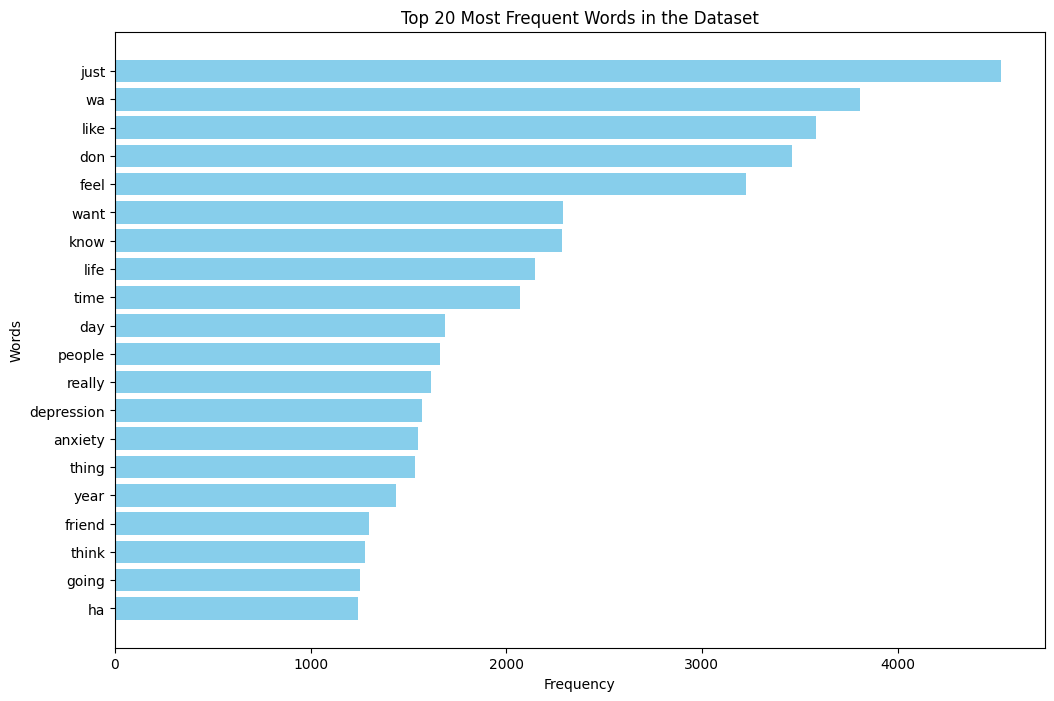

In [ ]:
# Plot the top 20 most frequent words
plt.figure(figsize=(12, 8))
plt.barh(word_freq_df.head(20)['Word'], word_freq_df.head(20)['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequent Words in the Dataset')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent word on top
plt.show()

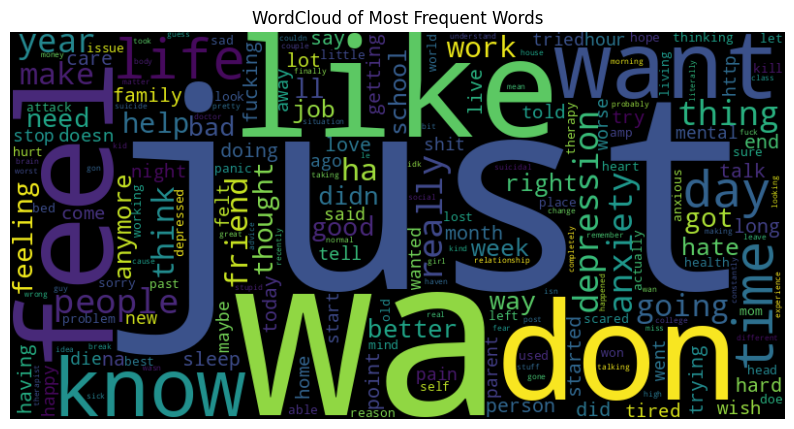

In [ ]:
# Optionally, create a WordCloud for visualization
wordcloud = WordCloud(stopwords='english', width=800, height=400, max_words=200).generate_from_frequencies(dict(zip(word_freq_df['Word'], word_freq_df['Frequency'])))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Most Frequent Words')
plt.show()

# **🧠Lemmatizing**

Lemmatization is a fundamental step in text preprocessing that transforms words into their base or dictionary form (known as a *lemma*). Unlike stemming, which may produce non-root forms (e.g., “caring” → “car”), lemmatization uses linguistic knowledge to ensure the output is a valid word (e.g., “caring” → “care”).

**✅ Purpose of Lemmatization:**
- **Reduces Dimensionality**: By consolidating different inflected forms of a word into a single representation, lemmatization helps reduce the size of the vocabulary.
- **Improves Model Generalization**: Models trained on lemmatized text are less likely to overfit on variations of the same word.
- **Enhances Semantic Understanding**: It preserves the actual meaning of the word better than stemming.

---


**⚙️ Implementation Details:**

- **NLTK’s WordNetLemmatizer** is used for the task, which requires the WordNet corpus.
- **Stopword Removal** is also applied in the same step to eliminate common words (e.g., “the”, “is”, “and”) that carry little semantic weight in classification tasks.
- The function `lemmatize_and_remove_stopwords()`:
  - Splits each sentence into individual words.
  - Filters out English stopwords using NLTK’s stopword list.
  - Applies lemmatization to each remaining word.
  - Reconstructs and returns the normalized sentence.

---


**📌 Outcome:**

The `clean_text` column in the dataset is updated with normalized, lemmatized, and stopword-free text. This version of the data serves as the foundation for all subsequent NLP tasks, including tokenization, vectorization, and feature engineering.


In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Function for lemmatization and stopword removal
def lemmatize_and_remove_stopwords(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

In [ ]:
# Lemmatize the text and remove stopwords
df['clean_text'] = df['clean_text'].apply(lemmatize_and_remove_stopwords)

# **🔤Tokenizing**

Tokenization is the process of breaking down text into smaller units—typically words or subwords—known as *tokens*. It is a crucial preprocessing step in any NLP pipeline, as it transforms unstructured raw text into a structured format suitable for analysis and modeling.

**✅ Purpose of Tokenization:**
- **Structure Creation**: Converts continuous text into discrete units that can be counted, embedded, or labeled.
- **Foundation for Feature Extraction**: Many downstream NLP techniques (e.g., Bag-of-Words, TF-IDF, Word2Vec) operate on tokens.
- **Enables Linguistic Analysis**: Tokens serve as the input for part-of-speech tagging, parsing, named entity recognition, and more.

---


**⚙️ Implementation Details:**

- **Library Used**: `nltk.tokenize.word_tokenize` from the Natural Language Toolkit (NLTK), which intelligently handles punctuation and edge cases common in English text.
- The tokenizer is applied to the preprocessed `clean_text` column (already lemmatized and stopword-free).
- Each text string is split into a list of word tokens and stored in a new variable, forming a corpus of tokenized documents.

---


**📌 Outcome:**

The result is a tokenized version of the cleaned dataset, where each document is represented as a list of individual words. These tokens are now ready for further linguistic processing and feature extraction such as n-gram modeling, POS tagging, or vectorization.

> This step ensures that text data is granular enough for both statistical and deep learning models to effectively extract patterns and context.


In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Tokenize the text into words
tokens = df['clean_text'].apply(word_tokenize)

# **Feature Extraction**

**🧩 Feature Extraction**

- Feature extraction is the process of converting raw text data into structured numerical representations that machine learning models can understand. In NLP, this typically involves transforming words, phrases, or linguistic patterns into vectors that capture meaningful information about the text.

- In this project, we explore multiple feature extraction techniques—including TF-IDF, Bag-of-Words, Word2Vec embeddings, N-grams, POS tagging, and dependency parsing—to capture different semantic, syntactic, and contextual aspects of the text.


## **📌TF_IDF**

TF-IDF is one of the most widely used techniques for transforming raw text into meaningful numerical features. It quantifies the importance of each word in a document relative to the entire corpus, balancing both word frequency and uniqueness.

**✅ Purpose of TF-IDF:**
- **Highlights Important Terms**: Common words across all documents are down-weighted, while distinctive terms are emphasized.
- **Improves Relevance**: Helps models focus on contextually significant words rather than just frequently occurring ones.
- **Sparse Representation**: Efficiently encodes large text corpora into a compact matrix suitable for traditional ML algorithms.

---


**🧮 How TF-IDF Works:**
- **Term Frequency (TF)**: Measures how frequently a word appears in a document.
- **Inverse Document Frequency (IDF)**: Penalizes words that appear in many documents, reducing their weight.

----


**⚙️ Implementation Details:**
- **Library Used**: `sklearn.feature_extraction.text.TfidfVectorizer`.

- The vectorizer is applied to the lemmatized and cleaned `clean_text` column.
- The resulting `tf_idf_feature` is a high-dimensional sparse matrix where each row represents a document, and each column corresponds to a unique term in the corpus.
- A DataFrame (`tf_idf_df`) is created to visualize the TF-IDF values in tabular form, with words as columns.

---


**📌 Outcome:**

Each Reddit post is now numerically represented by its TF-IDF vector, capturing both the frequency and uniqueness of its terms. This representation is well-suited for various classification algorithms, especially when interpretability and term-level weighting are important.

> TF-IDF is particularly effective in tasks like text classification, information retrieval, and document similarity analysis, making it a powerful and interpretable baseline feature extraction method.



In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_extractor = TfidfVectorizer()
tf_idf_feature = tf_idf_extractor.fit_transform(df['clean_text'])

In [ ]:
tf_idf_df = pd.DataFrame(tf_idf_feature.toarray(), columns=tf_idf_extractor.get_feature_names_out())

tf_idf_df

,00,000,0000,00000,000000,000000000,000mg,000s,009,00am,...,zurich,zvkczsxmjx,zwei,zxljdctvdp,zxz,zy,zyprexa,zzz,zzzz,zzzzzz
0,0.023419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.033611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7726,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7727,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7728,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7729,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **🧾CountVectorizer (BOW)**

The Bag-of-Words (BoW) model is a foundational technique in natural language processing that converts text into fixed-length numerical vectors. It represents text by counting the number of times each word appears, ignoring grammar and word order but preserving multiplicity.

**✅ Purpose of Bag-of-Words:**
- **Transforms Text into Vectors**: Enables machine learning algorithms to work with unstructured text data.
- **Captures Word Presence and Frequency**: Reflects how often specific terms appear in a document.
- **Simple and Interpretable**: Useful for initial models, baseline comparisons, and high-speed processing.

---


**⚙️ Implementation Details:**
- **Library Used**: `sklearn.feature_extraction.text.CountVectorizer`
- The vectorizer is fit and applied to the `clean_text` column, which contains lemmatized and cleaned documents.
- Each unique word in the corpus becomes a feature (column), and each document is represented as a vector of word counts.
- The output is stored in a sparse matrix, which is then converted into a DataFrame (`bow_df`) for easier inspection and further modeling.

---


**🔍 Characteristics of the BoW Model:**
- **Simplicity**: Does not account for context, word order, or semantics.
- **High-Dimensional**: The feature space grows with vocabulary size, which can lead to sparsity.
- **Noisy for Small Datasets**: Rare words or typos can create unnecessary features unless filtered.

---


**📌 Outcome:**

The BoW matrix encodes the frequency of terms across all documents, providing a straightforward but powerful feature representation. This representation is often effective for traditional classification models, especially when combined with dimensionality reduction or regularization.


> BoW is a strong baseline in many NLP tasks, and despite its simplicity, it often performs competitively in text classification problems.




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_extractor = CountVectorizer()
bow_feature = bow_extractor.fit_transform(df['clean_text'])

In [ ]:
bow_df = pd.DataFrame(bow_feature.toarray(), columns=bow_extractor.get_feature_names_out())

bow_df

,00,000,0000,00000,000000,000000000,000mg,000s,009,00am,...,zurich,zvkczsxmjx,zwei,zxljdctvdp,zxz,zy,zyprexa,zzz,zzzz,zzzzzz
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **🧠Word2Vector**

Word2Vec is a powerful neural embedding technique that represents words as dense vectors in a continuous vector space. Unlike Bag-of-Words or TF-IDF, which are based on frequency, Word2Vec captures the semantic and syntactic relationships between words by analyzing their contextual usage in large corpora.

**✅ Purpose of Word2Vec:**

- **Encodes Semantic Meaning**: Words with similar meanings are mapped to nearby points in the vector space.

- **Captures Contextual Relationships**: Embeddings are trained such that words appearing in similar contexts have similar vector representations.
- **Supports Averaging for Document Representation**: Multiple word vectors can be averaged to represent entire documents meaningfully.

---

**⚙️ Implementation Details:**

- **Library Used**: `spaCy`'s pre-trained `en_core_web_lg` model, which provides high-dimensional word embeddings (vector size = 300).
- Each document in the `clean_text` column is processed using SpaCy’s NLP pipeline.

- The function `get_mean_vector()`:
  - Extracts the vector of each word in the document (ignoring stopwords and punctuation).

  - Computes the mean of all word vectors to represent the document as a single vector.
  - Handles empty or invalid inputs by returning a zero vector.

- The resulting feature set is stored in a DataFrame (`word2vec_df`), where each row corresponds to a Reddit post, and each column is a vector dimension.

---

**🔍 Why Use Pretrained Vectors:**
- **Rich Representations**: Pretrained embeddings are derived from large corpora (e.g., Common Crawl), leading to high-quality word representations.
- **Reduced Training Cost**: Eliminates the need to train embeddings from scratch.
- **Domain Adaptability**: While trained on general data, they often transfer well to tasks like sentiment or mental health classification.

---


**📌 Outcome:**

Every document is now represented by a dense, continuous-valued vector capturing its overall semantic content. These embeddings provide a robust foundation for classifiers to generalize across diverse textual patterns and topics.

> Word2Vec is ideal for scenarios where capturing word meaning and context is essential. It often boosts performance in tasks involving semantic nuance, such as emotion or depression detection.


In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Load the pre-trained model
word2vec_extractor = spacy.load("en_core_web_lg")

In [ ]:
nlp = spacy.load("en_core_web_lg")

# Get the vector size from the model's meta data
vector_size = nlp.meta["vectors"]["width"]

# Function to get the mean vector for each document
def get_mean_vector(text):
    doc = nlp(text)

    # Get the word vectors for each token in the document, excluding stopwords and punctuation
    vectors = [token.vector for token in doc if not token.is_stop and not token.is_punct]

    # If there are valid vectors, compute the mean; otherwise, return a zero vector
    if len(vectors) > 0:
        mean_vector = np.mean(vectors, axis=0)
    else:
        mean_vector = np.zeros(vector_size)  # Return a zero vector if no valid tokens

    return mean_vector

# Apply the function to the clean_text column to get the mean vector for each document
word2vec_vector_features = df['clean_text'].apply(get_mean_vector)

In [ ]:
word2vec_df = pd.DataFrame(np.array(word2vec_vector_features.tolist()))

word2vec_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.166842,0.151383,-0.133084,0.054918,-0.104330,0.037650,0.038722,-0.135739,0.054351,2.040787,...,-0.104368,0.047353,-0.068150,0.028976,0.111246,0.003234,-0.045232,-0.090593,-0.040007,0.143377
1,-0.159668,0.157746,-0.182703,0.139403,-0.103568,0.005177,0.041607,-0.186442,0.069161,2.067799,...,-0.071387,0.035673,-0.088524,-0.026186,0.099647,-0.026092,-0.064600,-0.132094,0.007157,0.110696
2,0.063592,0.197737,-0.191171,-0.028854,-0.193053,-0.146598,-0.045236,-0.107155,0.057932,2.502557,...,-0.076843,0.026557,0.048977,0.009422,0.141120,0.247999,-0.081274,0.157474,-0.103817,0.018267
3,-0.155564,0.155308,-0.115653,-0.130581,-0.092052,-0.002614,0.066889,-0.174979,0.142028,2.180833,...,-0.015849,0.053898,-0.053834,-0.008651,0.179849,0.021111,-0.034906,-0.021221,-0.155978,0.022719
4,0.046457,0.131904,-0.160682,-0.004923,-0.035959,-0.043865,0.115506,0.006133,0.059342,2.133074,...,-0.033912,0.097428,0.010368,-0.033052,0.059508,0.203438,-0.038900,0.144929,-0.130713,0.017758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7726,0.416650,-0.042087,-0.071467,-0.600330,-0.089252,0.324060,0.060362,0.270450,-0.349180,1.601100,...,-0.766120,0.291570,0.121750,-0.258650,-0.121150,-0.533550,0.048856,0.610580,0.053764,-0.090988
7727,-0.284795,0.065308,-0.027947,-0.248325,0.078123,0.025683,0.517835,0.117102,0.182720,0.636109,...,0.065946,0.129465,-0.015970,0.097506,0.289926,0.546240,0.163321,-0.006760,-0.018580,-0.141485
7728,-0.134442,0.029307,-0.379503,-0.033404,0.260760,0.117466,-0.034578,0.002405,0.044971,2.368680,...,-0.294188,0.031807,0.030323,-0.026247,0.028704,-0.109910,-0.107074,-0.077653,0.152357,0.016699
7729,0.015572,-0.175373,-0.171729,-0.054013,0.002831,0.181966,0.185726,-0.316035,0.026242,0.845501,...,-0.036580,-0.058696,0.060031,-0.085299,0.074365,-0.070079,0.052118,-0.102113,0.127564,0.072297


## **🧩Part of Speech (POS) Tagging**

Part of Speech (POS) tagging is a core linguistic process that labels each word in a sentence with its grammatical role (e.g., noun, verb, adjective). By analyzing these syntactic roles, we can extract high-level linguistic features that go beyond word frequency or semantics.

**✅ Purpose of POS Tagging:**

- **Capture Grammatical Patterns**: Certain POS distributions (e.g., higher usage of pronouns or verbs) can correlate with mental health indicators.

- **Improve Model Interpretability**: POS-based features are interpretable and grounded in grammar, aiding in analysis and explainability.
- **Enable Structural Analysis**: Supports deeper linguistic analysis such as syntax-based features, sentence complexity, and writing style.

---

**⚙️ Implementation Details:**

- **Library Used**: `nltk.pos_tag` for tagging and `nltk.tokenize.word_tokenize` for tokenization.
- Each cleaned document is tokenized, and POS tags are assigned to each token using NLTK’s pretrained tagger.
- The tags are then aggregated to create **document-level POS features**:
  - Counts of major POS categories: *nouns*, *verbs*, *adjectives*, *adverbs*.
  - This transformation reduces variable-length tagged sequences into fixed-size feature vectors.

- A mapping (`pos_family`) groups granular POS tags into broader categories for simplified analysis.

---

**📊 Visualization:**

- POS distribution is visualized using both a **bar chart** and a **pie chart**, giving an overview of grammatical composition across the dataset.
- This helps in understanding overall language style and structure used in the Reddit posts.

---


**📌 Outcome:**

Each Reddit post is now represented by a vector of grammatical category frequencies. These features offer a unique perspective on how language is structured, which may correlate with psychological or emotional states.

> POS tagging is especially useful in psychological and sociolinguistic text analysis, where shifts in language usage patterns (e.g., increased use of pronouns, adjectives, or past-tense verbs) may reflect underlying mental health conditions.


In [ ]:
from nltk import pos_tag
from itertools import chain
from collections import Counter
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# Smart POS tagging function
def smart_pos_tag_tokens_to_df(tokens):
    # Check if it's a list of lists
    if any(isinstance(i, list) for i in tokens):
        # Flatten the tokens
        tokens = list(chain.from_iterable(tokens))

    # Now do POS tagging
    pos_tags = pos_tag(tokens)
    # Convert to DataFrame
    pos_df = pd.DataFrame(pos_tags, columns=['Word', 'POS'])
    return pos_df

In [ ]:
df_pos = smart_pos_tag_tokens_to_df(tokens)

df_pos

,Word,POS
0,understand,JJ
1,people,NNS
2,reply,VBP
3,immediately,RB
4,op,JJ
...,...,...
268574,stash,NN
268575,like,IN
268576,color,NN
268577,must,MD


In [ ]:
# **Feature Engineering from POS Tags**
def generate_pos_features(df_pos):
    """
    Convert POS tags into categorical features that can be used for training.
    This example creates simple features based on the counts of POS categories.
    """
    pos_family = {
        'noun': ['NN', 'NNS', 'NNP', 'NNPS'],
        'verb': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
        'adjective': ['JJ', 'JJR', 'JJS'],
        'adverb': ['RB', 'RBR', 'RBS']
    }

    # Initialize feature counts
    features = {category: 0 for category in pos_family.keys()}

    # Count occurrences of each POS category in the sentence
    for tag in df_pos['POS']:
        for category, pos_tags in pos_family.items():
            if tag in pos_tags:
                features[category] += 1

    return features


In [ ]:
pos_features = generate_pos_features(df_pos)

pos_features

{'noun': 108280, 'verb': 63505, 'adjective': 49368, 'adverb': 28282}

In [ ]:
# Applying POS Tagging and Feature Extraction
pos_features = tokens.apply(lambda x: generate_pos_features(smart_pos_tag_tokens_to_df(x)))

In [ ]:
# Convert POS features into a DataFrame
df_pos_feature = pd.DataFrame(pos_features.tolist())

df_pos_feature

,noun,verb,adjective,adverb
0,186,68,101,40
1,127,36,38,12
2,9,4,4,4
3,22,9,7,6
4,7,6,5,4
...,...,...,...,...
7726,1,0,0,0
7727,4,0,0,0
7728,3,2,0,1
7729,5,2,4,1


In [ ]:
pos_family = {
    'noun': ['NN', 'NNS', 'NNP', 'NNPS'],
    'verb': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'adjective': ['JJ', 'JJR', 'JJS'],
    'adverb': ['RB', 'RBR', 'RBS']
    }


# Function to map POS tags to a readable category
def map_pos_category(tag):
    for category, tags in pos_family.items():
        if tag in tags:
            return category
    return 'other'

# Function to plot bar chart and pie chart side-by-side
def side_by_side_pos_plots(pos_df):
    # Map POS tags to readable categories
    pos_df['POS Category'] = pos_df['POS'].apply(map_pos_category)

    # Count categories
    pos_counts = pos_df['POS Category'].value_counts()

    # Create figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # --- Bar Chart ---
    axes[0].bar(pos_counts.index, pos_counts.values)
    axes[0].set_xlabel('POS Category')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('POS Category Distribution (Bar Chart)')
    axes[0].grid(axis='y')

    # --- Pie Chart ---
    axes[1].pie(
        pos_counts.values,
        labels=pos_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        counterclock=False
    )
    axes[1].set_title('POS Category Distribution (Pie Chart)')
    axes[1].axis('equal')  # Equal aspect ratio for a perfect circle

    plt.tight_layout()
    plt.show()

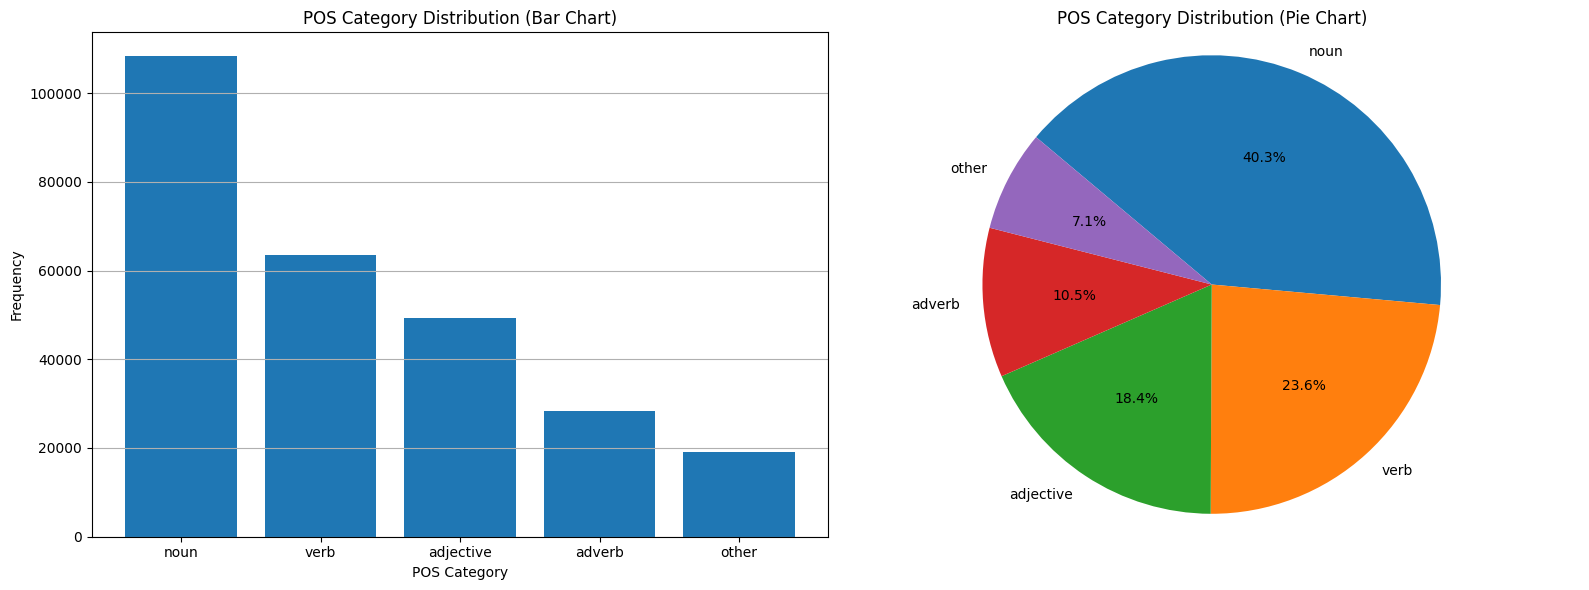

In [ ]:
# Assume you already have df_pos from POS tagging
side_by_side_pos_plots(df_pos)

## **🔗Dependency Parsing**

Dependency parsing is a linguistic technique that analyzes the grammatical structure of a sentence by identifying dependencies between words—specifically, which words modify or relate to others. Unlike Part of Speech (POS) tagging, which labels individual words, dependency parsing captures the relationships between them, forming a structured syntactic tree.

**✅ Purpose of Dependency Parsing:**

- **Understand Sentence Structure**: Reveals subject-verb-object relations and how words are interconnected.

- **Extract Deep Linguistic Features**: Provides more expressive features than surface-level text statistics.
- **Capture Writing Complexity**: Helps assess syntactic depth, which may reflect mental state, cognitive patterns, or emotional expression.

---

**⚙️ Implementation Details:**

- **Library Used**: `spaCy` with the `en_core_web_sm` model, which provides high-quality, pretrained dependency parsing.
- For each sentence in the `clean_text` column:
  - A `Doc` object is created using SpaCy’s NLP pipeline.
  - Each token’s dependency label (e.g., `nsubj`, `dobj`, `ROOT`, `prep`) and its head word are extracted and stored.
- A DataFrame (`df_parsed`) is created containing tokens, their dependency roles, and syntactic heads.

---


**🧮 Feature Engineering from Dependency Tags:**

- The function `extract_dependency_features()` computes:
  - **Counts of key syntactic roles**: e.g., number of subjects (`nsubj`), direct objects (`dobj`), modifiers (`amod`), etc.
  - **Structural metrics**:
    - `avg_word_length`: Average character length per word.
    - `avg_sentence_length`: Total number of tokens (as a proxy for sentence complexity).
- These features are compiled into a DataFrame for each document and later combined with the main dataset.


---


**📊 Visualization:**

- A bar chart is generated to display the distribution of dependency types across the corpus, using Plotly for interactive visualization.


---


**📌 Outcome:**

Each document is now represented by a set of syntactic features that describe its internal grammatical structure. These features can help models learn deeper linguistic patterns that are not captured by lexical representations alone.

> Dependency parsing is a valuable tool for understanding *how* things are said—not just *what* is said. This is particularly useful in psychological text analysis, where sentence structure may vary significantly based on mood, cognitive load, or emotional distress.


In [ ]:
import spacy

In [ ]:
# Load the English model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Increase the maximum length to handle larger texts
nlp.max_length = 2_000_000  # Set to a larger value if needed

In [ ]:
# Dependency parsing function
def dependency_parse(text):
    # Apply the model
    doc = nlp(text)

    # Create a DataFrame to store results
    parsed = pd.DataFrame(
        [(token.text, token.dep_, token.head.text) for token in doc],
        columns=['Word', 'Dependency', 'Head']
    )
    return parsed

In [ ]:
sentence = " ".join(df['clean_text'])

In [ ]:
df_parsed = dependency_parse(sentence)

df_parsed

,Word,Dependency,Head
0,understand,advcl,say
1,people,nsubj,reply
2,reply,ccomp,understand
3,immediately,advmod,reply
4,op,compound,invitation
...,...,...,...
269327,stash,dobj,swatching
269328,like,prep,swatching
269329,color,pobj,like
269330,must,aux,wait


In [ ]:
from spacy import displacy

# Parse only one sentence (or a few sentences) properly
sample_text = df['clean_text'].iloc[0]  # Take the first example (you can loop later)

doc = nlp(sample_text)

# Visualize with displaCy inside the notebook
displacy.render(doc, style="dep", jupyter=True)


In [ ]:
# Dependency Parsing Function to Extract Useful Features
def extract_dependency_features(text):
    """
    Extract features from dependency parsing, including dependency types and head words.
    This function returns a numerical representation of syntactic dependencies.
    """
    # Apply the dependency parser to the text
    doc = nlp(text)

    # Initialize feature dictionary
    dep_features = {
        'nsubj_count': 0, 'dobj_count': 0, 'ROOT_count': 0, 'amod_count': 0,
        'det_count': 0, 'prep_count': 0, 'pobj_count': 0, 'ccomp_count': 0, 'attr_count': 0,
        'avg_word_length': 0, 'avg_sentence_length': 0
    }

    # Count occurrences of each dependency
    for token in doc:
        if token.dep_ == 'nsubj': dep_features['nsubj_count'] += 1
        if token.dep_ == 'dobj': dep_features['dobj_count'] += 1
        if token.dep_ == 'ROOT': dep_features['ROOT_count'] += 1
        if token.dep_ == 'amod': dep_features['amod_count'] += 1
        if token.dep_ == 'det': dep_features['det_count'] += 1
        if token.dep_ == 'prep': dep_features['prep_count'] += 1
        if token.dep_ == 'pobj': dep_features['pobj_count'] += 1
        if token.dep_ == 'ccomp': dep_features['ccomp_count'] += 1
        if token.dep_ == 'attr': dep_features['attr_count'] += 1

    # Add average word and sentence length as additional features
    word_lengths = [len(token.text) for token in doc]
    dep_features['avg_word_length'] = np.mean(word_lengths) if word_lengths else 0
    dep_features['avg_sentence_length'] = len(doc)

    return dep_features

In [ ]:
# Apply dependency parsing to all sentences and create feature set
def generate_features_from_text(df):
    features_list = []
    for sentence in df['clean_text']:
        dep_features = extract_dependency_features(sentence)
        features_list.append(dep_features)
    return pd.DataFrame(features_list)

In [ ]:
# Generate features using the dependency parsing function
df_features = generate_features_from_text(df)

In [ ]:
# Display the generated features
print(pd.DataFrame(df_features))

      nsubj_count  dobj_count  ROOT_count  amod_count  det_count  prep_count  \
0              45          39           1          81          2           6   
1              18          22           2          35          0           2   
2               2           4           1           4          0           0   
3               2           3           2           5          0           2   
4               1           3           1           5          0           1   
...           ...         ...         ...         ...        ...         ...   
7726            0           0           1           0          0           0   
7727            0           0           1           1          0           0   
7728            1           1           1           0          0           0   
7729            1           2           1           2          0           0   
7730            1           1           1           2          0           1   

      pobj_count  ccomp_count  attr_cou

In [ ]:
# Combine Dependency Features with Other Features (e.g., TF-IDF, POS tags)
def combine_features_with_labels(df, dependency_features_df):
    """
    Combine dependency features with the label column into a complete feature set.
    """
    # Join the dependency features DataFrame with the original DataFrame
    combined_df = pd.concat([df, dependency_features_df], axis=1)

    return combined_df

In [ ]:
# Combine features and labels
combined_df = combine_features_with_labels(df, df_features)

In [ ]:
combined_df

,clean_text,is_depression,nsubj_count,dobj_count,ROOT_count,amod_count,det_count,prep_count,pobj_count,ccomp_count,attr_count,avg_word_length,avg_sentence_length
0,understand people reply immediately op invitat...,1,45,39,1,81,2,6,5,36,0,6.294537,421
1,welcome r depression check post place take mom...,1,18,22,2,35,0,2,1,13,0,6.122727,220
2,anyone else instead sleeping depressed stay ni...,1,2,4,1,4,0,0,0,0,0,5.695652,23
3,kind stuffed around lot life delaying inevitab...,1,2,3,2,5,0,2,5,3,0,5.361702,47
4,sleep greatest comforting escape whenever wake...,1,1,3,1,5,0,1,0,0,0,5.800000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7726,snow,0,0,0,1,0,0,0,0,0,0,4.000000,1
7727,moulin rouge mad cry,0,0,0,1,1,0,0,0,0,0,4.250000,4
7728,trying shout can't find people list,0,1,1,1,0,0,0,0,1,0,4.285714,7
7729,ughh can't find red sox hat got ta wear creepy...,0,1,2,1,2,0,0,0,1,0,3.785714,14


In [ ]:
import plotly.express as px

# Function to visualize the distribution of dependency types
def plot_dependency_distribution(dep_features_df):
    """
    Visualize the distribution of dependency types using Plotly.
    """
    # Sum up the counts of each dependency type across all sentences
    dep_feature_sums = dep_features_df.sum()

    # Convert to a DataFrame for easier plotting
    dep_feature_sums_df = pd.DataFrame(dep_feature_sums).reset_index()
    dep_feature_sums_df.columns = ['Dependency', 'Count']

    # Plot the distribution using Plotly
    fig = px.bar(
        dep_feature_sums_df,
        x='Dependency',
        y='Count',
        title='Distribution of Dependency Types Across Sentences',
        labels={'Dependency': 'Dependency Type', 'Count': 'Frequency'},
        color='Count',
        color_continuous_scale='Viridis'
    )
    fig.update_layout(xaxis_title="Dependency Type", yaxis_title="Count")
    fig.show()

# Visualize the distribution of dependency types
plot_dependency_distribution(df_features)


# **🧪Separating Features and Target**

Before training machine learning models, it's essential to prepare the dataset by separating the **input features** (independent variables) from the **target labels** (dependent variable). This ensures a clean workflow for model training, evaluation, and comparison across different feature extraction strategies.

**✅ Purpose of Feature-Target Separation:**

- **Clarifies Learning Objective**: Helps models focus on learning the mapping from inputs (text features) to outputs (labels).

- **Supports Modular Experimentation**: Allows switching between different feature types (e.g., TF-IDF, Word2Vec) while keeping the target consistent.
- **Enables Train-Test Splitting**: Prepares data for stratified sampling and evaluation.

----


**⚙️ Implementation Details:**

- **Target Variable**: The `is_depression` column indicates whether a Reddit post expresses depressive content (`1`) or not (`0`). This is used as the binary classification label.
  
- **Feature Sets Prepared**:
  - `x_tf`: TF-IDF features.
  - `x_bow`: Bag-of-Words features.
  - `x_pos`: Part of Speech (POS) tag features.
  - `x_dep`: Dependency parsing-based syntactic features.
  - `x_word2vec`: Semantic document embeddings derived from Word2Vec.

- Each `x_*` is paired with the corresponding target label vector `y_*`, which is always `df['is_depression']`.

- For the dependency parsing features (`x_dep`), non-numeric columns like `clean_text` and the label itself are explicitly dropped to ensure the feature matrix is purely numerical.


---

**📌 Outcome:**

Six distinct feature-label pairs are prepared, one for each type of text representation. These are used consistently in training and evaluating various classification models.



In [ ]:
x_tf = tf_idf_df
y_tf = df['is_depression']

In [ ]:
x_pos = df_pos_feature
y_pos = df['is_depression']

In [ ]:
x_dep = combined_df.drop(columns=['clean_text', 'is_depression'])
y_dep = combined_df['is_depression']

In [ ]:
x_bow = bow_df
y_bow = df['is_depression']

In [ ]:
x_word2vec = word2vec_df
y_word2vec = df['is_depression']

# **🧪Splitting the Dataset into Training and Testing Sets**

Once the features and target labels are prepared, the next crucial step is to split the dataset into **training** and **testing** subsets. This is a standard practice in supervised machine learning to evaluate how well a model generalizes to unseen data.

**✅ Purpose of Splitting:**

- **Training Set**: Used to train and fit the machine learning models.
- **Testing Set**: Held out from training and used exclusively for performance evaluation.

- **Avoids Overfitting**: Prevents models from memorizing the training data by validating performance on separate data.
- **Simulates Real-World Predictions**: Helps measure how well the model will perform in production on new, unseen posts.

---

**⚙️ Implementation Details:**

- **Library Used**: `train_test_split` from `sklearn.model_selection`.
- **Test Size**: 20% of the dataset is reserved for testing, ensuring a sufficient amount of unseen data for evaluation.
- **Random State**: Set to `42` to ensure reproducibility and consistency across experiments.
- Each feature-label pair from earlier (`x_tf`, `x_bow`,  `x_pos`, `x_dep`, `x_word2vec`) is split into:
  - `x_train_*`: training features
  - `x_test_*`: testing features
  - `y_train_*`: training labels
  - `y_test_*`: testing labels

This results in six pairs of training and test sets—one for each feature extraction method.

---

**📌 Outcome:**

The dataset is now split into well-defined training and testing sets for each feature type. This setup enables fair and consistent model evaluation across all vectorization strategies.



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(x_tf, y_tf, random_state=42, test_size=0.2 )

In [ ]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(x_bow, y_bow, random_state=42, test_size=0.2 )

In [ ]:
x_train_pos, x_test_pos, y_train_pos, y_test_pos = train_test_split(x_pos, y_pos, random_state=42, test_size=0.2 )

In [ ]:
x_train_dep, x_test_dep, y_train_dep, y_test_dep = train_test_split(x_dep, y_dep, random_state=42, test_size=0.2 )

In [ ]:
x_train_word2vec, x_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(x_word2vec, y_word2vec, random_state=42, test_size=0.2 )

# **🤖MLP**

The Multilayer Perceptron (MLP) is a type of feedforward artificial neural network capable of learning complex, non-linear patterns in data. It is well-suited for text classification tasks, especially when combined with rich feature representations like TF-IDF, Word2Vec, or syntactic features.

**✅ Why Use MLP for Text Classification?**

- **Non-Linear Learning**: MLPs can model interactions between features that linear models (like logistic regression) may miss.
- **Flexible Architecture**: Supports multiple layers and units, allowing the model to learn hierarchical representations of data.
- **Works with Various Input Types**: Compatible with both sparse (e.g., TF-IDF, BoW) and dense (e.g., Word2Vec) feature vectors.

**⚙️ Implementation Details:**

- **Library Used**: `sklearn.neural_network.MLPClassifier`
- For each feature set (TF-IDF, BoW, N-Grams, POS, Dependency, Word2Vec), a separate MLP model is trained.
- No advanced hyperparameter tuning is applied (default configuration), but the model is capable of learning well from the provided input.
- The model is trained on `x_train_*` and `y_train_*`, and evaluated on both the training and testing sets.

---

**📊 Evaluation Metrics:**

- **Classification Report**: Displays precision, recall, F1-score, and support for both classes.
- **Confusion Matrix**: Helps identify how many predictions were true positives, false positives, etc.
- **Accuracy Score**: Used for final performance comparison across different models and feature types.

---

**📌 Outcome:**

The MLP classifier is trained and evaluated across six different feature representations. Its ability to learn from high-dimensional or dense input makes it a strong candidate, especially when provided with semantically rich embeddings like Word2Vec or context-aware features like dependency parsing.

> MLP serves as a powerful neural baseline that often outperforms simpler models in NLP classification tasks—making it a valuable part of the model comparison framework.


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## **🤖 MLP for TF_IDF**

In this section, we apply the **Multilayer Perceptron (MLP)** classifier to the **TF-IDF**-based features of the dataset. TF-IDF is a widely used technique that transforms text data into numerical vectors by measuring the importance of each word in a document, considering both its frequency in the document and how unique it is across the entire corpus.

**✅ Why MLP for TF-IDF?**

- **Effective Feature Representation**: TF-IDF provides a robust representation of text, where important and distinctive terms are weighted higher, making them more informative for classification tasks.
- **MLP's Strength**: The MLP, a type of neural network, excels at learning complex relationships in data. It can capture non-linear patterns in the TF-IDF features that other models might miss.
- **Text Classification**: By training the MLP on TF-IDF vectors, we aim to learn the underlying patterns in the text that distinguish posts about depression from other types of posts.

---

**⚙️ Model Training:**
- The **MLPClassifier** from `sklearn` is used to train a model on the TF-IDF feature matrix (`x_train_tf`) and corresponding labels (`y_train_tf`).
- The model consists of multiple layers of neurons that learn to map the input features (TF-IDF values) to the output label (depression or not).
- During training, the MLP adjusts its internal weights to minimize the prediction error, effectively learning the relationship between the words in the posts and the likelihood of depression.

---

**📊 Model Evaluation:**
- Once trained, the MLP model is evaluated using standard classification metrics: **accuracy**, **precision**, **recall**, and **F1-score**. These metrics help assess the model’s ability to correctly classify both depression and non-depression posts.
- The **confusion matrix** provides further insights into the model’s performance by showing the true positives, true negatives, false positives, and false negatives.

---

**📌 Outcome:**

The MLP model, when trained on TF-IDF features, captures the important textual patterns and relationships in the data. It is particularly suited for this task because of its ability to process high-dimensional input like TF-IDF, which represents the frequency and importance of words in each document.

> This approach, using MLP with TF-IDF, is a powerful method for text classification tasks, and it often serves as a strong baseline in natural language processing problems such as sentiment analysis and depression detection.


In [ ]:
mlp = MLPClassifier()

In [ ]:
mlp.fit(x_train_tf, y_train_tf)

MLPClassifier()

In [ ]:
y_pred_train_mlp_tf = mlp.predict(x_train_tf)

In [ ]:
y_pred_test_mlp_tf = mlp.predict(x_test_tf)

In [ ]:
print(classification_report(y_pred_train_mlp_tf, y_train_tf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3120
           1       1.00      1.00      1.00      3064

    accuracy                           1.00      6184
   macro avg       1.00      1.00      1.00      6184
weighted avg       1.00      1.00      1.00      6184



In [ ]:
print(classification_report(y_pred_test_mlp_tf, y_test_tf))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       802
           1       0.93      0.95      0.94       745

    accuracy                           0.94      1547
   macro avg       0.94      0.94      0.94      1547
weighted avg       0.94      0.94      0.94      1547



In [ ]:
print(confusion_matrix(y_pred_test_mlp_tf, y_test_tf))

[[746  56]
 [ 37 708]]


In [ ]:
accuracy_score_mlp_tf = accuracy_score(y_pred_test_mlp_tf, y_test_tf)
accuracy_score_mlp_tf

0.9398836457659987

## **🤖 MLP for CountVectorizer(BOW)**

In this section, we train a **Multilayer Perceptron (MLP)** classifier using the **Bag of Words (BoW)** representation of the text data. BoW is a popular text vectorization method that converts text into numerical features by counting the frequency of each word in a document, without considering word order or grammar.

**✅ Why MLP for Bag of Words?**

- **Simplicity and Efficiency**: BoW is a simple and efficient way to represent text data. It captures word occurrence but ignores grammar and syntax, focusing purely on word frequency.
- **MLP's Non-Linearity**: The MLP classifier is a powerful neural network model capable of learning non-linear relationships in data, making it ideal for capturing complex patterns that may emerge from the BoW features.
- **Text Classification**: By training an MLP model on BoW features, we aim to classify Reddit posts as either depressive or non-depressive based on the frequency of words in each post.

---

**⚙️ Model Training:**
- The **MLPClassifier** from `sklearn` is used to train a neural network on the **BoW features** (`x_train_bow`) and their corresponding labels (`y_train_bow`).
- The MLP network adjusts its weights during training to minimize errors in predicting the target label, learning the relationship between the words (features) and the target classes (depression or not).

---

**📊 Model Evaluation:**
- After training, the MLP model's performance is evaluated using key metrics such as **accuracy**, **precision**, **recall**, and **F1-score**, which help gauge the model’s ability to correctly classify posts.
- A **confusion matrix** is also used to provide a clear breakdown of the number of true positives, false positives, true negatives, and false negatives.

---

**📌 Outcome:**

The MLP classifier, trained on BoW features, is capable of detecting patterns in the word frequency distributions of posts, distinguishing those associated with depressive content from non-depressive ones. This approach leverages the simplicity and effectiveness of BoW combined with the power of neural networks for capturing complex patterns in high-dimensional data.

> Using MLP with BoW is a commonly applied technique in text classification tasks, providing a strong baseline for performance in many NLP applications, including sentiment analysis and mental health detection.


In [ ]:
mlp_bow = MLPClassifier()

In [ ]:
mlp_bow.fit(x_train_bow, y_train_bow)

MLPClassifier()

In [ ]:
y_pred_train_mlp_bow = mlp_bow.predict(x_train_bow)

In [ ]:
y_pred_test_mlp_bow = mlp_bow.predict(x_test_bow)

In [ ]:
print(classification_report(y_pred_train_mlp_bow, y_train_bow))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3121
           1       1.00      1.00      1.00      3063

    accuracy                           1.00      6184
   macro avg       1.00      1.00      1.00      6184
weighted avg       1.00      1.00      1.00      6184



In [ ]:
print(classification_report(y_pred_test_mlp_bow, y_test_bow))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       783
           1       0.92      0.92      0.92       764

    accuracy                           0.92      1547
   macro avg       0.92      0.92      0.92      1547
weighted avg       0.92      0.92      0.92      1547



In [ ]:
print(confusion_matrix(y_pred_test_mlp_bow, y_test_bow))

[[722  61]
 [ 61 703]]


In [ ]:
accuracy_score_mlp_bow = accuracy_score(y_pred_test_mlp_bow, y_test_bow)
accuracy_score_mlp_bow

0.9211376858435681

## **🤖 MLP for Part of Speech (POS) Tagging**

In this section, we train a **Multilayer Perceptron (MLP)** classifier using features derived from **Part of Speech (POS) tagging**. POS tagging involves labeling each word in a sentence according to its grammatical role (e.g., noun, verb, adjective). These grammatical features can provide valuable insights into the underlying structure of the text, helping the model distinguish between depressive and non-depressive posts.

**✅ Why MLP for POS Tagging:**

- **Grammatical Features**: POS tags capture syntactic information about sentence structure, which can reveal deeper meanings and emotional undertones in text.
- **MLP’s Ability to Learn Non-Linear Patterns**: While POS tagging provides structured, categorical features, the MLP classifier is effective in learning complex non-linear relationships from these features to make accurate predictions.
- **Improved Performance**: By using POS features, the model can understand the function of each word in context, which is often crucial in tasks like detecting sentiment or emotional tone.

---

**⚙️ Model Training:**

- The **MLPClassifier** from `sklearn` is trained on the POS-based features (`x_train_pos`) and their corresponding labels (`y_train_pos`).
- The MLP adjusts its internal weights during training to minimize the prediction error, learning patterns that correlate specific grammatical structures with depressive or non-depressive posts.

---

**📊 Model Evaluation:**

- The trained model is evaluated using common classification metrics such as **accuracy**, **precision**, **recall**, and **F1-score**. These metrics give a comprehensive view of the model’s performance.
- A **confusion matrix** is also generated to show the true positives, false positives, true negatives, and false negatives, providing further insights into the model’s classification behavior.

---

**📌 Outcome:**

The MLP classifier, trained on POS features, uses syntactic patterns in the text to predict whether a Reddit post expresses depressive content. These grammatical features offer a unique perspective, helping the model understand the structure of the text, which can be particularly important in detecting mental health-related topics.

> Using POS-tagged features with MLP is an effective method for capturing linguistic patterns in text. It enhances the model’s ability to understand how words are used in context, which can improve performance in NLP tasks like depression detection or sentiment analysis.


In [ ]:
mlp_pos = MLPClassifier()

In [ ]:
mlp_pos.fit(x_train_pos, y_train_pos)

MLPClassifier()

In [ ]:
y_pred_train_mlp_pos = mlp_pos.predict(x_train_pos)

In [ ]:
y_pred_test_mlp_pos = mlp_pos.predict(x_test_pos)

In [ ]:
print(classification_report(y_pred_train_mlp_pos, y_train_pos))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      3723
           1       0.77      0.96      0.85      2461

    accuracy                           0.87      6184
   macro avg       0.87      0.88      0.87      6184
weighted avg       0.89      0.87      0.87      6184



In [ ]:
print(classification_report(y_pred_test_mlp_pos, y_test_pos))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       936
           1       0.76      0.95      0.84       611

    accuracy                           0.86      1547
   macro avg       0.86      0.87      0.86      1547
weighted avg       0.88      0.86      0.86      1547



In [ ]:
print(confusion_matrix(y_pred_test_mlp_pos, y_test_pos))

[[750 186]
 [ 33 578]]


In [ ]:
accuracy_score_mlp_pos = accuracy_score(y_pred_test_mlp_pos, y_test_pos)
accuracy_score_mlp_pos

0.8584356819650937

## **🤖 MLP for Dependency Parsing**

In this section, we train a **Multilayer Perceptron (MLP)** classifier using features derived from **Dependency Parsing**. Dependency parsing is a technique that analyzes the grammatical structure of a sentence by identifying relationships between words, such as subject-verb-object dependencies. These syntactic relationships provide deeper insights into sentence structure, which can be useful for text classification tasks like detecting depressive content in Reddit posts.

**✅ Why MLP for Dependency Parsing?**

- **Syntactic Relationships**: Dependency parsing captures how words are connected in a sentence, revealing underlying grammatical structures like subjects, objects, and modifiers. These relationships can be crucial for understanding sentiment and emotional tone in text.

- **Complex Pattern Recognition**: The MLP classifier is capable of learning complex, non-linear relationships in the features. By using dependency parsing features, the MLP can identify intricate patterns in sentence structure that may be indicative of depression or emotional distress.
- **Contextual Understanding**: Dependency parsing allows the model to understand not just the words but also how they relate to each other in context, offering a richer feature set compared to simpler methods like Bag of Words (BoW) or TF-IDF.

---


**⚙️ Model Training:**

- The **MLPClassifier** from `sklearn` is trained on the dependency parsing-based features (`x_train_dep`) and their corresponding labels (`y_train_dep`).
- The MLP model is trained to learn the patterns between the syntactic features (e.g., number of subjects, objects, and modifiers) and the target labels (depression or not).
- During training, the MLP optimizes its internal weights to minimize the prediction error, capturing complex relationships between sentence structure and depression indicators.

---

**📊 Model Evaluation:**

- Once trained, the model is evaluated using key classification metrics such as **accuracy**, **precision**, **recall**, and **F1-score**, providing a comprehensive assessment of its performance.
- The **confusion matrix** is used to visualize how well the model distinguishes between depressive and non-depressive posts, highlighting the number of true positives, false positives, true negatives, and false negatives.



**📌 Outcome:**

The MLP classifier, trained on features derived from dependency parsing, is capable of recognizing complex syntactic patterns in the text. These patterns can indicate emotional or psychological states, helping the model identify posts related to depression. This method benefits from the deep syntactic analysis provided by dependency parsing, which enhances the model’s performance in tasks requiring a nuanced understanding of sentence structure.

> Using dependency parsing with MLP allows the model to capture syntactic complexity and learn deeper relationships within the text. This approach is particularly useful for NLP tasks such as emotion detection, sentiment analysis, and identifying signs of mental health conditions.


In [ ]:
mlp_dep = MLPClassifier()

In [ ]:
mlp_dep.fit(x_train_dep, y_train_dep)

MLPClassifier()

In [ ]:
y_pred_train_mlp_dep = mlp_dep.predict(x_train_dep)

In [ ]:
y_pred_test_mlp_dep = mlp_dep.predict(x_test_dep)

In [ ]:
print(classification_report(y_pred_train_mlp_dep, y_train_dep, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      3644
           1       0.80      0.96      0.87      2540

    accuracy                           0.89      6184
   macro avg       0.88      0.90      0.88      6184
weighted avg       0.90      0.89      0.89      6184



In [ ]:
print(classification_report(y_pred_test_mlp_dep, y_test_dep, zero_division=0))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89       912
           1       0.79      0.95      0.86       635

    accuracy                           0.88      1547
   macro avg       0.87      0.89      0.87      1547
weighted avg       0.89      0.88      0.88      1547



In [ ]:
print(confusion_matrix(y_pred_test_mlp_dep, y_test_dep))

[[751 161]
 [ 32 603]]


In [ ]:
accuracy_score_mlp_dep = accuracy_score(y_pred_test_mlp_dep, y_test_dep)
accuracy_score_mlp_dep

0.8752424046541694

## **🤖 MLP for Word2Vector**

In this section, we train a **Multilayer Perceptron (MLP)** classifier using **Word2Vec** embeddings as input features. Word2Vec is a powerful technique that represents words in a continuous vector space, where words with similar meanings are placed closer together. This method captures semantic relationships between words, making it particularly useful for tasks that require understanding of word meanings in context, such as detecting depressive language in Reddit posts.

**✅ Why MLP for Word2Vec?**

- **Rich Semantic Features**: Word2Vec embeddings provide dense, continuous representations of words that capture their meanings based on context. These embeddings can encode subtle relationships between words, such as synonyms or antonyms, making them highly effective for text classification.

- **MLP's Non-Linear Capability**: While Word2Vec captures semantic information, the MLP classifier can learn complex non-linear relationships between these word embeddings and the target labels (depression vs. non-depression). This allows the model to identify intricate patterns in the semantic space that are indicative of emotional tone.
- **Contextual Understanding**: Word2Vec vectors are trained on large corpora and reflect the relationships between words in context. This enables the MLP model to make predictions based on deeper semantic meaning rather than just surface-level features like word frequency.

---


**⚙️ Model Training:**

- The **MLPClassifier** from `sklearn` is trained on the **Word2Vec features** (`x_train_word2vec`) and their corresponding labels (`y_train_word2vec`).
- The Word2Vec vectors are averaged to create a single feature vector for each document (Reddit post), capturing the overall meaning of the text.
- The MLP adjusts its weights during training to minimize errors in classification, learning how semantic information from Word2Vec relates to the depression label.

---


**📊 Model Evaluation:**

- After training, the model is evaluated using standard classification metrics, including **accuracy**, **precision**, **recall**, and **F1-score**. These metrics provide a comprehensive view of how well the model is able to classify posts as depressive or non-depressive.
- The **confusion matrix** is also used to visualize the model's performance, breaking down the true positives, false positives, true negatives, and false negatives, giving more insight into how the model makes its predictions.

---

**📌 Outcome:**

The MLP model, trained on Word2Vec embeddings, leverages the semantic richness of the word vectors to classify text. By capturing contextual meanings and relationships between words, this approach enables the model to detect depressive content more accurately. Word2Vec’s ability to represent words in a dense vector space helps the MLP identify complex patterns that traditional methods like TF-IDF or Bag of Words may miss.

> Using Word2Vec with MLP provides a powerful combination for text classification, especially in tasks where understanding word meaning and context is crucial. This method is well-suited for tasks like sentiment analysis, emotion detection, and mental health prediction, where capturing the deeper nuances of language is key.


In [ ]:
mlp_word2vec = MLPClassifier()

In [ ]:
mlp_word2vec.fit(x_train_word2vec, y_train_word2vec)

MLPClassifier()

In [ ]:
y_pred_train_mlp_word2vec = mlp_word2vec.predict(x_train_word2vec)

In [ ]:
y_pred_test_mlp_word2vec = mlp_word2vec.predict(x_test_word2vec)

In [ ]:
print(classification_report(y_pred_train_mlp_word2vec, y_train_word2vec))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3116
           1       1.00      1.00      1.00      3068

    accuracy                           1.00      6184
   macro avg       1.00      1.00      1.00      6184
weighted avg       1.00      1.00      1.00      6184



In [ ]:
print(classification_report(y_pred_test_mlp_word2vec, y_test_word2vec))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       736
           1       0.97      0.91      0.94       811

    accuracy                           0.94      1547
   macro avg       0.94      0.94      0.94      1547
weighted avg       0.94      0.94      0.94      1547



In [ ]:
print(confusion_matrix(y_pred_test_mlp_word2vec, y_test_word2vec))

[[713  23]
 [ 70 741]]


In [ ]:
accuracy_score_mlp_word2vec = accuracy_score(y_pred_test_mlp_word2vec, y_test_word2vec)
accuracy_score_mlp_word2vec

0.9398836457659987

# **👽 LogisticRegression**

In this section, we use **Logistic Regression** for classifying Reddit posts as either **depressive** or **non-depressive**. Logistic Regression is a powerful yet interpretable linear model commonly used for binary classification tasks. It estimates the probability that a given input belongs to a certain class, making it a natural fit for tasks like sentiment analysis and depression detection.

**✅ Why Logistic Regression?**

- **Simplicity and Efficiency**: Logistic Regression is computationally efficient and works well when the relationship between features and the target is approximately linear.

- **Probabilistic Output**: Unlike traditional classifiers, Logistic Regression outputs probabilities, which can be valuable for understanding model confidence and making threshold-based decisions.
- **Interpretable**: The coefficients of the model are easy to interpret, which helps in understanding which features are driving the predictions, an important aspect for explainable AI.

---

**⚙️ Model Training:**

- **Library Used**: `sklearn.linear_model.LogisticRegression`.
- The model is trained on the feature sets, such as **TF-IDF**, **Bag of Words (BoW)**, **POS tagging**, **Dependency parsing**, and **Word2Vec** embeddings, with the target labels indicating depressive content.
- Logistic Regression finds the best-fit line (or hyperplane in higher dimensions) that separates the two classes, with the goal of minimizing the classification error.
- The **regularization** technique is used (default is L2 regularization) to prevent overfitting, particularly when working with high-dimensional features like TF-IDF or Word2Vec.

---


**📌 Outcome:**

Logistic Regression provides a straightforward and effective approach for binary classification tasks, with an emphasis on probabilistic decision-making. In this context, it works well with features derived from different text representations, offering interpretable insights into which words or patterns drive the prediction of depression in Reddit posts.

> Logistic Regression is a solid choice for text classification tasks where interpretability and efficiency are key. It performs well as a baseline model and can offer strong results when combined with well-engineered features such as TF-IDF and Word2Vec.


In [ ]:
from sklearn.linear_model import LogisticRegression

## **👽 LogisticRegression for TF_IDF**

In this section, we train a **Logistic Regression** model using **TF-IDF** (Term Frequency-Inverse Document Frequency) features to classify Reddit posts as either **depressive** or **non-depressive**. TF-IDF is a widely used text representation technique that captures both the frequency of words in a document and their importance across the entire dataset. When paired with Logistic Regression, this combination offers an efficient and effective solution for text classification tasks.

**✅ Why Logistic Regression for TF-IDF?**

- **TF-IDF Features**: TF-IDF highlights important words in a document by weighting rare words more heavily than common ones. This ensures that the model focuses on the most informative terms for classifying posts.

- **Linear Decision Boundaries**: Logistic Regression is well-suited for tasks where the relationship between features (such as word frequencies) and the target class is roughly linear, making it effective for the TF-IDF feature set.
- **Efficiency and Interpretability**: Logistic Regression is computationally efficient and easy to interpret, providing insights into the relative importance of different features (words) based on their coefficients.

---

**⚙️ Model Training:**

- **Library Used**: `sklearn.linear_model.LogisticRegression`.
- The model is trained on the TF-IDF feature matrix (`x_train_tf`) and the corresponding target labels (`y_train_tf`).
  - **Regularization**: Logistic Regression uses L2 regularization by default to avoid overfitting, which is particularly useful when working with high-dimensional TF-IDF features.
  - The model is trained to find the optimal weights for each word, helping it distinguish between depressive and non-depressive posts based on their TF-IDF scores.

---

**📊 Model Evaluation:**

- The performance of the model is assessed using several key metrics:
  - **Accuracy**: The proportion of correct predictions across all samples.
  - **Precision** and **Recall**: These metrics give insight into the model’s ability to correctly classify depressive posts (positive class).
  - **F1-Score**: The harmonic mean of precision and recall, providing a balanced measure of performance.
- The **confusion matrix** is also used to visualize the true positives, false positives, true negatives, and false negatives, offering a deeper understanding of the model's classification performance.

---

**📌 Outcome:**

Logistic Regression, when applied to TF-IDF features, offers a simple yet powerful approach to text classification. By leveraging the informative weights from TF-IDF, the model learns to identify patterns in word usage that differentiate depressive posts from non-depressive ones.

> Using Logistic Regression with TF-IDF is an effective and interpretable solution for text classification tasks. It strikes a balance between performance and simplicity, making it a great choice for baseline models and interpretable AI applications like mental health detection.


In [ ]:
log_tf = LogisticRegression()

In [ ]:
log_tf.fit(x_train_tf, y_train_tf)

LogisticRegression()

In [ ]:
y_pred_train_log_tf = log_tf.predict(x_train_tf)

In [ ]:
y_pred_test_log_tf = log_tf.predict(x_test_tf)

In [ ]:
print(classification_report(y_pred_train_log_tf, y_train_tf))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3237
           1       0.95      0.99      0.97      2947

    accuracy                           0.97      6184
   macro avg       0.97      0.97      0.97      6184
weighted avg       0.97      0.97      0.97      6184



In [ ]:
print(classification_report(y_pred_test_log_tf, y_test_tf))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       831
           1       0.92      0.98      0.95       716

    accuracy                           0.95      1547
   macro avg       0.95      0.95      0.95      1547
weighted avg       0.95      0.95      0.95      1547



In [ ]:
print(confusion_matrix(y_pred_test_log_tf, y_test_tf))

[[769  62]
 [ 14 702]]


In [ ]:
accuracy_score_log_tf = accuracy_score(y_pred_test_log_tf, y_test_tf)
accuracy_score_log_tf

0.9508726567550096

## **👽 LogisticRegression for CountVectorizer(BOW)**

In this section, we apply **Logistic Regression** to the **Bag of Words (BoW)** feature representation of the dataset to classify Reddit posts as **depressive** or **non-depressive**. The BoW model represents text as a matrix of word counts, where each document is described by the frequency of words it contains. Logistic Regression, a simple and interpretable linear classifier, is then used to distinguish between depressive and non-depressive posts based on these word frequencies.

**✅ Why Logistic Regression for Bag of Words?**

- **BoW Features**: The BoW model captures the presence and frequency of words in a document. It is simple yet powerful for text classification tasks, especially when the relationship between words and labels is relatively linear.
- **Linear Decision Boundaries**: Logistic Regression is effective when the relationship between features (in this case, word frequencies) and the target variable (depression vs. non-depression) is linear. The model learns to associate specific words with the target class.
- **Interpretability**: Logistic Regression provides coefficients for each word feature, offering insights into which terms are most indicative of depressive or non-depressive content.

---

**⚙️ Model Training:**

- **Library Used**: `sklearn.linear_model.LogisticRegression`.
- The model is trained on the **Bag of Words** feature matrix (`x_train_bow`) and the corresponding target labels (`y_train_bow`).
  - **Regularization**: Logistic Regression uses L2 regularization by default to prevent overfitting, which is important given the high-dimensional nature of the BoW features.
  - During training, the model learns the weights for each word, helping it make decisions based on the presence and frequency of words associated with depression.

---

**📊 Model Evaluation:**

- After training, the model's performance is assessed using a variety of classification metrics:
  - **Accuracy**: The overall percentage of correct predictions made by the model.
  - **Precision and Recall**: Metrics that evaluate how well the model identifies depressive posts (positive class).
  - **F1-Score**: The harmonic mean of precision and recall, providing a single measure of the model’s ability to balance false positives and false negatives.
- The **confusion matrix** is also used to visualize the performance of the model, showing the true positives, false positives, true negatives, and false negatives.

---

**📌 Outcome:**

Logistic Regression with Bag of Words offers a straightforward yet effective approach to text classification. By analyzing word frequency distributions, the model learns to distinguish between depressive and non-depressive language based on the words used in each post.

> Using Logistic Regression with BoW is a great method for text classification, especially for problems like detecting depression. It's a powerful, interpretable baseline approach that provides meaningful insights into the relationship between text features and the target variable.


In [ ]:
log_bow = LogisticRegression()

In [ ]:
log_bow.fit(x_train_bow, y_train_bow)

LogisticRegression()

In [ ]:
y_pred_train_log_bow = log_bow.predict(x_train_bow)

In [ ]:
y_pred_test_log_bow = log_bow.predict(x_test_bow)

In [ ]:
print(classification_report(y_pred_train_log_bow, y_train_bow))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3187
           1       0.98      1.00      0.99      2997

    accuracy                           0.99      6184
   macro avg       0.99      0.99      0.99      6184
weighted avg       0.99      0.99      0.99      6184



In [ ]:
print(classification_report(y_pred_test_log_bow, y_test_bow))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       830
           1       0.93      0.99      0.95       717

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547



In [ ]:
print(confusion_matrix(y_pred_test_log_bow, y_test_bow))

[[773  57]
 [ 10 707]]


In [ ]:
accuracy_score_log_bow = accuracy_score(y_pred_test_log_bow, y_test_bow)
accuracy_score_log_bow

0.9566903684550744

## **👽 LogisticRegression for Part of Speech (POS) Tagging**

In this section, we use **Logistic Regression** to classify Reddit posts as **depressive** or **non-depressive** based on features derived from **Part of Speech (POS) tagging**. POS tagging provides information about the grammatical structure of a sentence by labeling words according to their role (e.g., noun, verb, adjective). Logistic Regression, a linear model, is applied to these POS features to understand how different parts of speech contribute to identifying depressive language.

**✅ Why Logistic Regression for POS Tagging?**

- **Grammatical Structure**: POS tagging captures key syntactic information, such as the frequency of nouns, verbs, adjectives, and adverbs. These grammatical patterns can offer insights into the emotional tone or mental state expressed in a text.

- **Interpretability**: Logistic Regression is highly interpretable, with coefficients indicating the influence of different POS categories on the model's predictions. This is especially useful when analyzing how the structure of language correlates with depression.
- **Simplicity and Efficiency**: Logistic Regression works well with high-dimensional feature spaces like POS tags, providing a simple yet effective way to classify text based on grammatical patterns.

---

**⚙️ Model Training:**

- **Library Used**: `sklearn.linear_model.LogisticRegression`.
- The model is trained on the **POS-based features** (`x_train_pos`) and the corresponding target labels (`y_train_pos`).
  - **Regularization**: Logistic Regression uses L2 regularization by default, which helps prevent overfitting, particularly when working with a large number of POS categories.
  - The model learns to associate different POS patterns (e.g., a higher frequency of adjectives or pronouns) with the likelihood of depression.

---

**📊 Model Evaluation:**

- After training, the model's performance is evaluated using classification metrics such as:
  - **Accuracy**: Measures the overall correctness of the model's predictions.
  - **Precision and Recall**: These metrics focus on how well the model identifies depressive posts, with a particular emphasis on minimizing false negatives (depressive posts misclassified as non-depressive).
  - **F1-Score**: Balances precision and recall into a single metric to assess the model’s overall performance.
- A **confusion matrix** is also generated, providing a visual breakdown of the model’s true positives, false positives, true negatives, and false negatives.

---

**📌 Outcome:**

Logistic Regression, when applied to POS features, allows the model to leverage the syntactic structure of the text for classification. By focusing on the grammatical makeup of each post, the model learns how different parts of speech contribute to recognizing depressive language.

> Using Logistic Regression with POS tagging is a powerful approach for capturing linguistic patterns related to emotional expression. This method offers valuable insights into how syntactic choices (such as the frequency of adjectives or pronouns) can signal depressive content in text.


In [ ]:
log_pos = LogisticRegression()

In [ ]:
log_pos.fit(x_train_pos, y_train_pos)

LogisticRegression()

In [ ]:
y_pred_train_log_pos = log_pos.predict(x_train_pos)

In [ ]:
y_pred_test_log_pos = log_pos.predict(x_test_pos)

In [ ]:
print(classification_report(y_pred_train_log_pos, y_train_pos))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      3648
           1       0.77      0.93      0.85      2536

    accuracy                           0.86      6184
   macro avg       0.86      0.87      0.86      6184
weighted avg       0.88      0.86      0.86      6184



In [ ]:
print(classification_report(y_pred_test_log_pos, y_test_pos))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       917
           1       0.77      0.94      0.85       630

    accuracy                           0.86      1547
   macro avg       0.86      0.87      0.86      1547
weighted avg       0.88      0.86      0.86      1547



In [ ]:
print(confusion_matrix(y_pred_test_log_pos, y_test_pos))

[[743 174]
 [ 40 590]]


In [ ]:
accuracy_score_log_pos = accuracy_score(y_pred_test_log_pos, y_test_pos)
accuracy_score_log_pos

0.8616677440206852

## **👽 LogisticRegression for Dependency Parsing**

In this section, we apply **Logistic Regression** to features derived from **Dependency Parsing** to classify Reddit posts as **depressive** or **non-depressive**. Dependency parsing provides a detailed syntactic analysis by identifying the relationships between words in a sentence, such as subject-verb-object connections. Logistic Regression is then used to classify posts based on these syntactic features, helping the model capture more complex relationships within the text.

**✅ Why Logistic Regression for Dependency Parsing?**

- **Syntactic Structure**: Dependency parsing captures the relationships between words, offering deeper insights into sentence structure that go beyond word frequency. For example, the relationship between the subject and predicate can reveal emotional intensity or subjectivity.

- **Feature Richness**: By using dependency-based features, we provide the model with information about how words connect and influence each other within a sentence. This can be especially useful in detecting nuanced emotional expressions, which are often encoded in sentence structure.
- **Interpretability**: Logistic Regression is easy to interpret, with the coefficients indicating the strength and direction of influence each syntactic feature (such as the number of subjects, objects, or verb forms) has on the classification outcome.

---

**⚙️ Model Training:**

- **Library Used**: `sklearn.linear_model.LogisticRegression`.
- The model is trained on the **dependency parsing features** (`x_train_dep`) and the corresponding target labels (`y_train_dep`).
  - **Regularization**: Logistic Regression applies L2 regularization by default, which helps prevent overfitting when dealing with complex features like those from dependency parsing.
  - The model learns to recognize specific syntactic patterns—such as the presence of certain types of dependencies or sentence structures—that are associated with depressive or non-depressive posts.

---

**📊 Model Evaluation:**

- The model's performance is evaluated using standard classification metrics, including:
  - **Accuracy**: Measures the overall correctness of the model's predictions.
  - **Precision and Recall**: Focus on how well the model identifies depressive posts, with particular attention to false positives and false negatives.
  - **F1-Score**: Combines precision and recall to offer a balanced measure of the model’s performance.
- A **confusion matrix** is used to further analyze how the model performs, showing the true positives, false positives, true negatives, and false negatives.

---

**📌 Outcome:**

Logistic Regression, trained on dependency parsing features, is able to leverage the deep syntactic relationships in the text to distinguish between depressive and non-depressive posts. By capturing how words are connected syntactically, the model can identify patterns that are indicative of emotional or psychological states.

> Logistic Regression with dependency parsing offers a powerful way to capture and classify more complex language structures. By understanding word relationships, this approach enhances the model's ability to detect subtle emotional cues, making it an effective tool for tasks such as sentiment analysis and mental health detection.


In [ ]:
log_dep = LogisticRegression()

In [ ]:
log_dep.fit(x_train_dep, y_train_dep)

LogisticRegression()

In [ ]:
y_pred_train_log_dep = log_dep.predict(x_train_dep)

In [ ]:
y_pred_test_log_dep = log_dep.predict(x_test_dep)

In [ ]:
print(classification_report(y_pred_train_log_dep, y_train_dep))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3578
           1       0.80      0.94      0.87      2606

    accuracy                           0.88      6184
   macro avg       0.88      0.89      0.88      6184
weighted avg       0.89      0.88      0.88      6184



In [ ]:
print(classification_report(y_pred_test_log_dep, y_test_dep))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       892
           1       0.80      0.93      0.86       655

    accuracy                           0.87      1547
   macro avg       0.87      0.88      0.87      1547
weighted avg       0.88      0.87      0.87      1547



In [ ]:
print(confusion_matrix(y_pred_test_log_dep, y_test_dep))

[[737 155]
 [ 46 609]]


In [ ]:
accuracy_score_log_dep = accuracy_score(y_pred_test_log_dep, y_test_dep)
accuracy_score_log_dep

0.870071105365223

## **👽 LogisticRegression for Word2Vector**

In this section, we apply **Logistic Regression** to classify Reddit posts as **depressive** or **non-depressive** based on **Word2Vec** embeddings. Word2Vec is a technique that generates dense vector representations of words, capturing their semantic meanings based on context. By using Logistic Regression, we can classify posts based on these rich, semantic features, offering a powerful approach for text classification tasks.

**✅ Why Logistic Regression for Word2Vec?**

- **Word2Vec Embeddings**: Word2Vec transforms words into continuous vectors that encode semantic relationships, such as similarity or contextual meaning. These embeddings help capture subtle nuances in language, such as synonyms or related terms, which are crucial for detecting depression-related content.

- **Linear Classification**: Logistic Regression is a linear model that is effective when the relationship between features (word vectors) and the target class (depressive vs. non-depressive) is relatively linear. With Word2Vec embeddings, these linear relationships are more easily captured, as the embeddings already provide rich contextual information.
- **Interpretability**: Logistic Regression is highly interpretable, and the coefficients can be analyzed to understand which semantic features (words) have the most influence on the classification. This is especially useful when trying to interpret the decision-making process in a model.

---

**⚙️ Model Training:**

- **Library Used**: `sklearn.linear_model.LogisticRegression`.
- The model is trained on **Word2Vec embeddings** (`x_train_word2vec`) and the corresponding target labels (`y_train_word2vec`).
  - **Regularization**: L2 regularization is applied by default in Logistic Regression, which helps prevent overfitting when working with high-dimensional word vectors.
  - The training process involves the model learning the relationships between the semantic content of the words (represented by their Word2Vec vectors) and the likelihood of the post being depressive or non-depressive.

---

**📊 Model Evaluation:**

- After training, the performance of the model is evaluated using classification metrics such as:
  - **Accuracy**: Measures the overall correctness of the model’s predictions.
  - **Precision and Recall**: Focus on how effectively the model identifies depressive posts, with a particular emphasis on minimizing false positives and false negatives.
  - **F1-Score**: The harmonic mean of precision and recall, providing a balanced measure of the model's performance.
- A **confusion matrix** is also used to assess how well the model distinguishes between the two classes, showing true positives, false positives, true negatives, and false negatives.


---

**📌 Outcome:**

By training Logistic Regression on Word2Vec embeddings, the model is able to leverage the rich semantic relationships between words to classify Reddit posts accurately. This approach makes use of the deep contextual information embedded in Word2Vec vectors, allowing the model to detect depression-related content based on the meaning of the words used.

> Logistic Regression with Word2Vec embeddings offers a powerful combination for text classification. By focusing on the semantic relationships between words, this method provides a more nuanced understanding of language, making it well-suited for tasks such as sentiment analysis and mental health detection.


In [ ]:
log_word2vec = LogisticRegression()

In [ ]:
log_word2vec.fit(x_train_word2vec, y_train_word2vec)

LogisticRegression()

In [ ]:
y_pred_train_log_word2vec = log_word2vec.predict(x_train_word2vec)

In [ ]:
y_pred_test_log_word2vec = log_word2vec.predict(x_test_word2vec)

In [ ]:
print(classification_report(y_pred_train_log_word2vec, y_train_word2vec))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3073
           1       0.94      0.93      0.94      3111

    accuracy                           0.94      6184
   macro avg       0.94      0.94      0.94      6184
weighted avg       0.94      0.94      0.94      6184



In [ ]:
print(classification_report(y_pred_test_log_word2vec, y_test_word2vec))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       740
           1       0.95      0.90      0.92       807

    accuracy                           0.92      1547
   macro avg       0.92      0.92      0.92      1547
weighted avg       0.92      0.92      0.92      1547



In [ ]:
print(confusion_matrix(y_pred_test_log_word2vec, y_test_word2vec))

[[701  39]
 [ 82 725]]


In [ ]:
accuracy_score_log_word2vec = accuracy_score(y_pred_test_log_word2vec, y_test_word2vec)
accuracy_score_log_word2vec

0.9217840982546864

# **⚡ Naive Bayes**

In this section, we utilize the **Naive Bayes** classifier for detecting depressive content in Reddit posts. Naive Bayes is a family of probabilistic classifiers based on applying Bayes’ theorem with a strong assumption of feature independence. Despite this simplifying assumption, Naive Bayes performs remarkably well in many text classification tasks.

**✅ Why Naive Bayes?**

- **Probabilistic Model**: Naive Bayes models the probability that a given document belongs to a class based on the observed features, making it well-suited for text data.

- **Feature Independence Assumption**: Assumes that features (e.g., word occurrences) are conditionally independent given the class, which simplifies computation and works surprisingly well in practice.
- **Efficiency and Scalability**: Naive Bayes is computationally efficient, requiring less training time compared to more complex models, and can handle large feature spaces typical of NLP tasks.
- **Strong Baseline**: Often used as a baseline in text classification problems due to its simplicity and robustness.

---

**⚙️ Model Variants Used:**

- **Multinomial Naive Bayes**: Suitable for discrete count features such as those produced by TF-IDF or Bag of Words vectorization.
- **Gaussian Naive Bayes**: Used when features are continuous, such as Word2Vec embeddings.

---


**⚙️ Model Training:**

- The classifier is trained on different feature sets (e.g., TF-IDF, BoW, POS tags, dependency parsing, Word2Vec embeddings) along with the target labels indicating depressive or non-depressive posts.
- The model learns the likelihood of each feature occurring in each class and uses Bayes’ theorem to predict the class of new posts based on observed features.

---

**📊 Model Evaluation:**

- The trained Naive Bayes models are evaluated using:
  - **Accuracy**: The proportion of correct predictions.
  - **Precision and Recall**: Metrics that evaluate the model's ability to correctly identify depressive posts while minimizing false positives and false negatives.
  - **F1-Score**: The harmonic mean of precision and recall, providing a balanced measure of performance.
- **Confusion Matrices** provide further insight into the distribution of prediction errors.

---

**📌 Outcome:**

Naive Bayes offers a simple yet effective approach for classifying text data. Its probabilistic nature and efficiency make it especially useful when working with high-dimensional feature spaces like those encountered in natural language processing. Although it assumes feature independence, it often provides strong baseline performance in detecting depressive language in Reddit posts.

> Naive Bayes is a classic, fast, and robust classifier for NLP tasks, providing a useful benchmark against which more complex models can be compared.


In [ ]:
from sklearn.naive_bayes import MultinomialNB

## **⚡ Naive Bayes for TF_IDF**

In this section, we apply the **Multinomial Naive Bayes** classifier to the **TF-IDF** feature representation of Reddit posts to detect depressive content. TF-IDF captures the importance of words in each document relative to the entire corpus, while Multinomial Naive Bayes models the likelihood of word occurrences under the assumption of feature independence.

**✅ Why Naive Bayes with TF-IDF?**

- **Probabilistic Text Classification**: Multinomial Naive Bayes works well with discrete, count-based features like TF-IDF, making it suitable for text classification tasks.

- **Feature Independence Assumption**: Assumes that each word contributes independently to the probability of a post being depressive, simplifying computations while maintaining strong performance.
- **Efficiency**: Naive Bayes is fast to train and predict, which is beneficial for large datasets or when rapid model iteration is needed.
- **Strong Baseline**: Often serves as a reliable baseline for text classification tasks, providing a benchmark to compare against more complex models.

---


**⚙️ Model Training:**

- The **Multinomial Naive Bayes** model from `sklearn.naive_bayes` is trained on the TF-IDF feature matrix (`x_train_tf`) and corresponding labels (`y_train_tf`).
- The model estimates the probability of each word appearing in depressive vs. non-depressive posts and uses Bayes’ theorem to predict the class for new posts.

---


**📊 Model Evaluation:**

- The model is evaluated using:
  - **Accuracy**: Measures the proportion of correctly classified posts.
  - **Precision and Recall**: Assess the model's ability to identify depressive posts correctly and to minimize misclassifications.
  - **F1-Score**: Provides a balanced metric combining precision and recall.
- A **confusion matrix** visualizes the distribution of true and false positives and negatives, giving insight into the types of errors made.

---


**📌 Outcome:**

Multinomial Naive Bayes, when applied to TF-IDF features, offers an effective and computationally efficient method for detecting depression-related content in Reddit posts. Despite its simplifying assumptions, it often achieves competitive performance, making it a valuable part of the model comparison framework.

> Using Naive Bayes with TF-IDF combines probabilistic modeling with a rich representation of term importance, creating a strong and interpretable baseline for depression detection in text.


In [ ]:
naive_tf = MultinomialNB()

In [ ]:
naive_tf.fit(x_train_tf, y_train_tf)

MultinomialNB()

In [ ]:
y_pred_train_naive_tf = naive_tf.predict(x_train_tf)

In [ ]:
y_pred_test_naive_tf = naive_tf.predict(x_test_tf)

In [ ]:
print(classification_report(y_pred_train_naive_tf, y_train_tf))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2635
           1       1.00      0.86      0.92      3549

    accuracy                           0.92      6184
   macro avg       0.92      0.93      0.92      6184
weighted avg       0.93      0.92      0.92      6184



In [ ]:
print(classification_report(y_pred_test_naive_tf, y_test_tf))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81       560
           1       0.98      0.76      0.86       987

    accuracy                           0.84      1547
   macro avg       0.84      0.87      0.83      1547
weighted avg       0.88      0.84      0.84      1547



In [ ]:
print(confusion_matrix(y_pred_test_naive_tf, y_test_tf))

[[546  14]
 [237 750]]


In [ ]:
accuracy_score_naive_tf = accuracy_score(y_pred_test_naive_tf, y_test_tf)
accuracy_score_naive_tf

0.8377504848093084

## **⚡ Naive Bayes for CountVectorizer(BOW)**

In this section, we apply the **Multinomial Naive Bayes** classifier to the **Bag of Words (BoW)** feature representation of Reddit posts to classify content as depressive or non-depressive. BoW captures the frequency of each word in a document, serving as a simple yet effective way to represent text data for machine learning models.

**✅ Why Naive Bayes with BoW?**

- **Probabilistic Classification**: Multinomial Naive Bayes models the likelihood of word counts in depressive versus non-depressive posts, providing a probabilistic framework that works well with discrete features.
- **Feature Independence Assumption**: Assumes that the presence of each word is independent of others given the class label, which simplifies the computation while yielding strong performance in many text classification tasks.
- **Efficiency**: The model trains quickly and scales well with large feature sets common in BoW representations.
- **Baseline Model**: Naive Bayes with BoW often serves as a reliable baseline in NLP tasks, providing a standard for comparing more complex models.

---


**⚙️ Model Training:**

- The **Multinomial Naive Bayes** classifier from `sklearn.naive_bayes` is trained on the BoW feature matrix (`x_train_bow`) along with corresponding labels (`y_train_bow`).
- The model estimates the probability distribution of word counts for each class and applies Bayes’ theorem to classify new posts based on their word frequencies.

---


**📊 Model Evaluation:**

- The model’s performance is assessed using:
  - **Accuracy**: The overall proportion of correct predictions.
  - **Precision and Recall**: Evaluate the model’s effectiveness in correctly identifying depressive posts while minimizing false positives and negatives.
  - **F1-Score**: Provides a balanced metric that combines precision and recall.
- A **confusion matrix** visualizes prediction outcomes, detailing the counts of true positives, false positives, true negatives, and false negatives.

---


**📌 Outcome:**

Multinomial Naive Bayes with BoW features offers a straightforward and efficient approach to text classification. Despite its simplicity and independence assumptions, it often delivers strong baseline performance in depression detection, making it an essential component of the overall modeling framework.

> Combining Naive Bayes with BoW leverages a probabilistic method and a simple text representation, providing a robust and interpretable baseline for NLP classification tasks.


In [ ]:
naive_bow = MultinomialNB()

In [ ]:
naive_bow.fit(x_train_bow, y_train_bow)

MultinomialNB()

In [ ]:
y_pred_train_naive_bow = naive_bow.predict(x_train_bow)

In [ ]:
y_pred_test_naive_bow = naive_bow.predict(x_test_bow)

In [ ]:
print(classification_report(y_pred_train_naive_bow, y_train_bow))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2751
           1       0.98      0.87      0.92      3433

    accuracy                           0.92      6184
   macro avg       0.92      0.93      0.92      6184
weighted avg       0.93      0.92      0.92      6184



In [ ]:
print(classification_report(y_pred_test_naive_bow, y_test_bow))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       639
           1       0.96      0.81      0.88       908

    accuracy                           0.87      1547
   macro avg       0.87      0.88      0.87      1547
weighted avg       0.89      0.87      0.87      1547



In [ ]:
print(confusion_matrix(y_pred_test_naive_bow, y_test_bow))

[[612  27]
 [171 737]]


In [ ]:
accuracy_score_naive_bow = accuracy_score(y_pred_test_naive_bow, y_test_bow)
accuracy_score_naive_bow

0.8720103425985779

## **⚡ Naive Bayes for Part of Speech (POS) Tagging**

In this section, we apply the **Multinomial Naive Bayes** classifier to features derived from **Part of Speech (POS) tagging** to classify Reddit posts as depressive or non-depressive. POS tagging labels words by their grammatical roles (e.g., noun, verb, adjective), providing structured linguistic information that complements traditional word-based features.

**✅ Why Naive Bayes with POS Features?**

- **Structured Linguistic Features**: POS tags capture the grammatical composition of text, revealing patterns that may correlate with emotional or psychological states.
- **Probabilistic Framework**: Naive Bayes models the probability of POS tag occurrences given the class, leveraging feature independence assumptions for computational efficiency.
- **Baseline Effectiveness**: Naive Bayes with POS features offers a simple yet effective baseline for understanding how grammatical structures relate to depression detection.

----


**⚙️ Model Training:**

- The **Multinomial Naive Bayes** classifier is trained on POS tag count features (`x_train_pos`) alongside their corresponding labels (`y_train_pos`).
- The model learns the likelihood of different POS tag frequencies for depressive and non-depressive classes and uses Bayes’ theorem to classify new instances.

---


**📊 Model Evaluation:**
- Model performance is evaluated using metrics such as:
  - **Accuracy**: The proportion of correctly classified posts.
  - **Precision and Recall**: Assess the model's ability to accurately detect depressive posts while minimizing false classifications.
  - **F1-Score**: Provides a balanced view combining precision and recall.
- A **confusion matrix** is used to visualize the distribution of true and false predictions across classes.

---


**📌 Outcome:**

Naive Bayes applied to POS features provides an interpretable and computationally efficient approach to depression detection in text. By focusing on grammatical patterns, the model gains insights beyond word frequency, potentially improving classification by leveraging syntactic cues.

> Naive Bayes with POS tagging combines linguistic structure with probabilistic classification, offering a useful tool for understanding and detecting depressive language patterns in social media posts.


In [ ]:
naive_pos = MultinomialNB()

In [ ]:
naive_pos.fit(x_train_pos, y_train_pos)

MultinomialNB()

In [ ]:
y_pred_train_naive_pos = naive_pos.predict(x_train_pos)

In [ ]:
y_pred_test_naive_pos = naive_pos.predict(x_test_pos)

In [ ]:
print(classification_report(y_pred_train_naive_pos, y_train_pos))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      3197
           1       0.62      0.63      0.63      2987

    accuracy                           0.63      6184
   macro avg       0.63      0.63      0.63      6184
weighted avg       0.63      0.63      0.63      6184



In [ ]:
print(classification_report(y_pred_test_naive_pos, y_test_pos))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       816
           1       0.60      0.63      0.61       731

    accuracy                           0.63      1547
   macro avg       0.63      0.63      0.63      1547
weighted avg       0.63      0.63      0.63      1547



In [ ]:
print(confusion_matrix(y_pred_test_naive_pos, y_test_pos))

[[511 305]
 [272 459]]


In [ ]:
accuracy_score_naive_pos = accuracy_score(y_pred_test_naive_pos, y_test_pos)
accuracy_score_naive_pos

0.6270200387847447

## **⚡ Naive Bayes for Part of Dependency Parsing**

In this section, we apply the **Multinomial Naive Bayes** classifier to features derived from **Dependency Parsing** to classify Reddit posts as depressive or non-depressive. Dependency parsing analyzes the grammatical structure of sentences by identifying relationships between words, such as subjects, objects, and modifiers, providing rich syntactic information.

**✅ Why Naive Bayes with Dependency Parsing?**

- **Syntactic Feature Modeling**: Dependency parsing features capture how words relate syntactically within a sentence, offering deeper linguistic cues than simple word counts.
- **Probabilistic Classification**: Naive Bayes models the likelihood of dependency features occurring within each class, using the assumption of conditional independence for efficient computation.
- **Baseline Effectiveness**: Despite the complexity of dependency features, Naive Bayes can provide a strong and interpretable baseline for classification tasks involving syntactic information.

---


**⚙️ Model Training:**

- The **Multinomial Naive Bayes** classifier is trained on the syntactic feature matrix derived from dependency parsing (`x_train_dep`) with corresponding labels (`y_train_dep`).
- The model learns probability distributions over syntactic features for depressive and non-depressive posts and predicts class membership based on these distributions.

---


**📊 Model Evaluation:**

- Performance is measured using:
  - **Accuracy**: The overall correctness of predictions.
  - **Precision and Recall**: Reflect how well the model identifies depressive content while minimizing false positives and false negatives.
  - **F1-Score**: Balances precision and recall to provide a comprehensive performance metric.
- A **confusion matrix** visualizes the distribution of true and false predictions across classes.

---


**📌 Outcome:**

Using Naive Bayes with dependency parsing features offers a probabilistic approach that leverages syntactic structures within the text. This method helps the model capture deeper grammatical patterns related to depressive language, providing an interpretable and efficient baseline for NLP-based mental health detection.

> Combining dependency parsing with Naive Bayes blends syntactic insight with probabilistic modeling, enhancing the model’s ability to detect nuanced linguistic cues indicative of depression.


In [ ]:
naive_dep = MultinomialNB()

In [ ]:
naive_dep.fit(x_train_dep, y_train_dep)

MultinomialNB()

In [ ]:
y_pred_train_naive_dep = naive_dep.predict(x_train_dep)

In [ ]:
y_pred_test_naive_dep = naive_dep.predict(x_test_dep)

In [ ]:
print(classification_report(y_pred_train_naive_dep, y_train_dep))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      3991
           1       0.69      0.97      0.81      2193

    accuracy                           0.84      6184
   macro avg       0.84      0.87      0.83      6184
weighted avg       0.88      0.84      0.84      6184



In [ ]:
print(classification_report(y_pred_test_naive_dep, y_test_dep))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       997
           1       0.69      0.96      0.80       550

    accuracy                           0.83      1547
   macro avg       0.83      0.86      0.83      1547
weighted avg       0.87      0.83      0.83      1547



In [ ]:
print(confusion_matrix(y_pred_test_naive_dep, y_test_dep))

[[759 238]
 [ 24 526]]


In [ ]:
accuracy_score_naive_dep = accuracy_score(y_pred_test_naive_dep, y_test_dep)
accuracy_score_naive_dep

0.8306399482870072

## **⚡ Naive Bayes for Word2Vector**

In this section, we use **Gaussian Naive Bayes** to classify Reddit posts as depressive or non-depressive based on **Word2Vec** embeddings. Word2Vec generates dense, continuous vector representations of words that capture semantic and contextual relationships, providing a rich feature set for classification.

**✅ Why Gaussian Naive Bayes with Word2Vec?**

- **Continuous Feature Handling**: Unlike Multinomial Naive Bayes, Gaussian Naive Bayes models continuous data, making it suitable for the dense, real-valued vectors produced by Word2Vec.

- **Probabilistic Classification**: The model estimates the likelihood of the observed word vector features under each class assuming Gaussian distributions, enabling efficient and interpretable classification.
- **Baseline for Embeddings**: Gaussian Naive Bayes serves as a simple, fast baseline when working with embedding-based features, helping assess the effectiveness of semantic representations in classification.

---


**⚙️ Model Training:**

- The **Gaussian Naive Bayes** classifier from `sklearn.naive_bayes` is trained on the Word2Vec feature matrix (`x_train_word2vec`) and the corresponding labels (`y_train_word2vec`).
- The model assumes that the features for each class are normally distributed and learns the mean and variance of each feature per class during training.


---

**📊 Model Evaluation:**

- Model performance is evaluated using:
  - **Accuracy**: The proportion of correctly classified posts.
  - **Precision and Recall**: Assess the model’s ability to correctly identify depressive posts while minimizing false positives and negatives.
  - **F1-Score**: The harmonic mean of precision and recall, providing a balanced measure of performance.
- The **confusion matrix** visualizes the distribution of predictions, highlighting true positives, false positives, true negatives, and false negatives.

---

**📌 Outcome:**

Gaussian Naive Bayes applied to Word2Vec embeddings offers a probabilistic and computationally efficient approach to classifying text based on semantic features. Although it assumes normally distributed features and feature independence, it provides a useful baseline for embedding-based classification tasks such as depression detection.

> Using Gaussian Naive Bayes with Word2Vec embeddings combines semantic richness with probabilistic modeling, offering an interpretable and efficient method for mental health text classification.


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_word2vec = GaussianNB()

In [ ]:
naive_word2vec.fit(x_train_word2vec, y_train_word2vec)

GaussianNB()

In [ ]:
y_pred_train_naive_word2vec = naive_word2vec.predict(x_train_word2vec)

In [ ]:
y_pred_test_naive_word2vec = naive_word2vec.predict(x_test_word2vec)

In [ ]:
print(classification_report(y_pred_train_naive_word2vec, y_train_word2vec))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2921
           1       0.86      0.81      0.84      3263

    accuracy                           0.83      6184
   macro avg       0.83      0.84      0.83      6184
weighted avg       0.84      0.83      0.83      6184



In [ ]:
print(classification_report(y_pred_test_naive_word2vec, y_test_word2vec))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       719
           1       0.88      0.81      0.84       828

    accuracy                           0.84      1547
   macro avg       0.84      0.84      0.84      1547
weighted avg       0.84      0.84      0.84      1547



In [ ]:
print(confusion_matrix(y_pred_test_naive_word2vec, y_test_word2vec))

[[625  94]
 [158 670]]


In [ ]:
accuracy_score_naive_word2vec = accuracy_score(y_pred_test_naive_word2vec, y_test_word2vec)
accuracy_score_naive_word2vec

0.8371040723981901

# **🧬 Random Forest**

In this section, we use the **Random Forest** algorithm to classify Reddit posts as depressive or non-depressive. Random Forest is an ensemble learning method that builds multiple decision trees and aggregates their predictions to improve accuracy and control overfitting.

**✅ Why Random Forest?**

- **Ensemble Approach**: Combines multiple decision trees to reduce variance and improve generalization compared to individual trees.
- **Robust to Overfitting**: By averaging predictions from many trees, Random Forest mitigates the risk of overfitting, especially in high-dimensional feature spaces common in text data.
- **Handles Complex Data**: Captures non-linear relationships and feature interactions without requiring extensive feature engineering.
- **Feature Importance**: Provides insights into which features contribute most to the model's decisions, enhancing interpretability.

---


**⚙️ Model Training:**

- **Library Used**: `sklearn.ensemble.RandomForestClassifier`.
- The model is trained on various feature sets including TF-IDF, Bag of Words, POS tags, dependency parsing features, and Word2Vec embeddings, paired with their respective labels.
- The algorithm builds multiple decision trees using random subsets of features and data samples, and outputs the class selected by the majority of trees.

----


**📊 Model Evaluation:**

- Performance is evaluated through:
  - **Accuracy**: Overall correctness of predictions.
  - **Precision and Recall**: Measures of the model’s ability to correctly identify depressive posts and avoid false positives.
  - **F1-Score**: A balance between precision and recall.
- The **confusion matrix** offers a detailed view of true positives, false positives, true negatives, and false negatives.

---

**📌 Outcome:**

Random Forest leverages ensemble learning to improve prediction stability and accuracy for depression detection in text data. Its ability to model complex patterns and interactions among features makes it a powerful method for this classification task.

> Random Forest is a versatile and robust classifier that balances interpretability and performance, making it well-suited for complex NLP tasks like detecting depressive language in social media posts.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

## **🧬 Random Forest for TF_IDF**

In this section, we train a **Random Forest** classifier using **TF-IDF** features to classify Reddit posts as depressive or non-depressive. TF-IDF captures the importance of words in each document relative to the entire corpus, and Random Forest leverages ensemble learning to model complex relationships within these features.

**✅ Why Random Forest for TF-IDF?**

- **Handling High-Dimensional Data**: TF-IDF generates a large number of features corresponding to unique terms. Random Forest can effectively manage this high dimensionality by building multiple decision trees on random subsets of features.
- **Modeling Non-Linear Relationships**: Random Forest captures complex interactions between words that linear models may miss, improving classification performance.

- **Robustness and Overfitting Control**: By averaging predictions from many trees, Random Forest reduces the risk of overfitting often encountered with single decision trees.
- **Feature Importance Insights**: The model can provide information about which TF-IDF features (words) contribute most to the prediction, aiding interpretability.

----

**⚙️ Model Training:**

- The **RandomForestClassifier** from `sklearn.ensemble` is trained on the TF-IDF feature matrix (`x_train_tf`) and corresponding labels (`y_train_tf`).
- The algorithm constructs multiple decision trees using random subsets of TF-IDF features and training samples.
- Final predictions are made by majority voting across all trees, enhancing stability and accuracy.

---


**📊 Model Evaluation:**

- The model is evaluated using:
  - **Accuracy**: The overall proportion of correct classifications.
  - **Precision and Recall**: Assess the model’s ability to accurately identify depressive posts.
  - **F1-Score**: Balances precision and recall into a single metric.
- A **confusion matrix** is generated to visualize the distribution of true and false positives and negatives.

---

**📌 Outcome:**

Random Forest trained on TF-IDF features combines the richness of term importance representation with the power of ensemble learning. This approach effectively captures complex textual patterns indicative of depression while maintaining robustness against overfitting.

> Applying Random Forest to TF-IDF features offers a strong and interpretable model for text classification, making it well-suited for detecting depressive language in social media content.


In [ ]:
rf_tf = RandomForestClassifier()

In [ ]:
rf_tf.fit(x_train_tf, y_train_tf)

RandomForestClassifier()

In [ ]:
y_pred_train_rf_tf = rf_tf.predict(x_train_tf)

In [ ]:
y_pred_test_rf_tf = rf_tf.predict(x_test_tf)

In [ ]:
print(classification_report(y_pred_train_rf_tf, y_train_tf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3119
           1       1.00      1.00      1.00      3065

    accuracy                           1.00      6184
   macro avg       1.00      1.00      1.00      6184
weighted avg       1.00      1.00      1.00      6184



In [ ]:
print(classification_report(y_pred_test_rf_tf, y_test_tf))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       854
           1       0.90      0.99      0.94       693

    accuracy                           0.95      1547
   macro avg       0.95      0.95      0.95      1547
weighted avg       0.95      0.95      0.95      1547



In [ ]:
print(confusion_matrix(y_pred_test_rf_tf, y_test_tf))

[[778  76]
 [  5 688]]


In [ ]:
accuracy_score_rf_tf = accuracy_score(y_pred_test_rf_tf, y_test_tf)
accuracy_score_rf_tf

0.9476405946994182

## **🧬 Random Forest for CountVectorizer (BOW)**

In this section, we train a **Random Forest** classifier using the **Bag of Words (BoW)** representation of Reddit posts to classify them as depressive or non-depressive. The BoW model encodes text as word frequency counts, while Random Forest leverages ensemble learning to capture complex patterns within these features.

**✅ Why Random Forest for BoW?**

- **Effective with High-Dimensional Sparse Data**: BoW produces high-dimensional, sparse feature vectors. Random Forest can handle this complexity by building multiple decision trees on random subsets of features, improving model robustness.
- **Capturing Non-Linear Interactions**: Unlike linear models, Random Forest can model complex, non-linear relationships between word frequencies and depression-related content.
- **Reducing Overfitting**: By aggregating predictions from many trees, Random Forest mitigates overfitting, which is common with single decision trees on sparse data.

- **Interpretability**: Feature importance metrics from Random Forest provide insights into which words contribute most to detecting depressive language.

---


**⚙️ Model Training:**

- The **RandomForestClassifier** from `sklearn.ensemble` is trained on the BoW feature matrix (`x_train_bow`) and the corresponding labels (`y_train_bow`).
- The model builds an ensemble of decision trees using bootstrap samples and random subsets of word features.
- Predictions are determined by majority voting among the trees, enhancing accuracy and stability.

---


**📊 Model Evaluation:**

- Performance is evaluated using:
  - **Accuracy**: Overall correctness of classifications.
  - **Precision and Recall**: Effectiveness in identifying depressive posts and minimizing false positives.
  - **F1-Score**: Harmonic mean of precision and recall for balanced assessment.
- The **confusion matrix** visualizes true and false classifications, offering detailed insight into model behavior.

---


**📌 Outcome:**

Random Forest applied to BoW features combines the simplicity of word frequency representation with the power of ensemble learning. This approach effectively identifies complex patterns in word usage associated with depressive content while maintaining robustness against noise and overfitting.

> Using Random Forest with Bag of Words is a versatile and powerful strategy for text classification tasks, making it highly suitable for mental health detection from social media posts.


In [ ]:
rf_bow = RandomForestClassifier()

In [ ]:
rf_bow.fit(x_train_bow, y_train_bow)

RandomForestClassifier()

In [ ]:
y_pred_train_rf_bow = rf_bow.predict(x_train_bow)

In [ ]:
y_pred_test_rf_bow = rf_bow.predict(x_test_bow)

In [ ]:
print(classification_report(y_pred_train_rf_bow, y_train_bow))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3119
           1       1.00      1.00      1.00      3065

    accuracy                           1.00      6184
   macro avg       1.00      1.00      1.00      6184
weighted avg       1.00      1.00      1.00      6184



In [ ]:
print(classification_report(y_pred_test_rf_bow, y_test_bow))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       834
           1       0.91      0.98      0.94       713

    accuracy                           0.95      1547
   macro avg       0.94      0.95      0.94      1547
weighted avg       0.95      0.95      0.95      1547



In [ ]:
print(confusion_matrix(y_pred_test_rf_bow, y_test_bow))

[[766  68]
 [ 17 696]]


In [ ]:
accuracy_score_rf_bow = accuracy_score(y_pred_test_rf_bow, y_test_bow)
accuracy_score_rf_bow

0.945054945054945

## **🧬 Random Forest for Part of Speech (POS) Tagging**

In this section, we train a **Random Forest** classifier using features derived from **Part of Speech (POS) tagging** to classify Reddit posts as depressive or non-depressive. POS tagging provides grammatical information about the text, capturing the distribution of nouns, verbs, adjectives, and other word types that can be indicative of emotional tone and mental state.

**✅ Why Random Forest for POS Features?**

- **Utilizing Grammatical Patterns**: POS features capture the syntactic structure of language, which can reveal subtle cues related to depression or emotional states.

- **Handling Complex Feature Interactions**: Random Forest excels at modeling non-linear interactions between different POS categories, improving predictive performance.
- **Robustness Against Overfitting**: The ensemble nature of Random Forest reduces overfitting, which is important when working with features that may have complex dependencies.
- **Feature Importance Insights**: The model provides measures of feature importance, helping identify which POS categories contribute most to detecting depressive language.


---


**⚙️ Model Training:**

- The **RandomForestClassifier** from `sklearn.ensemble` is trained on POS feature vectors (`x_train_pos`) alongside the target labels (`y_train_pos`).
- The classifier builds multiple decision trees using random subsets of features and data samples.
- Predictions are aggregated by majority vote to improve stability and accuracy.

---


**📊 Model Evaluation:**

- The model’s effectiveness is assessed using:
  - **Accuracy**: The overall proportion of correctly classified posts.
  - **Precision and Recall**: The ability to correctly identify depressive posts while minimizing false positives and false negatives.
  - **F1-Score**: The harmonic mean of precision and recall for balanced evaluation.
- A **confusion matrix** further details true and false classification counts, offering deeper insight into model performance.


---


**📌 Outcome:**

Random Forest applied to POS features leverages syntactic information to detect patterns in language associated with depression. This approach combines the strengths of grammatical analysis with robust ensemble learning, resulting in improved classification performance and interpretability.

> Using Random Forest with POS tagging enables the model to capture important linguistic structures linked to emotional states, making it a powerful tool for mental health detection in textual data.


In [ ]:
rf_pos = RandomForestClassifier()

In [ ]:
rf_pos.fit(x_train_pos, y_train_pos)

RandomForestClassifier()

In [ ]:
y_pred_train_rf_pos = rf_pos.predict(x_train_pos)

In [ ]:
y_pred_test_rf_pos = rf_pos.predict(x_test_pos)

In [ ]:
print(classification_report(y_pred_train_rf_pos, y_train_pos))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3587
           1       0.82      0.97      0.89      2597

    accuracy                           0.90      6184
   macro avg       0.90      0.91      0.90      6184
weighted avg       0.91      0.90      0.90      6184



In [ ]:
print(classification_report(y_pred_test_rf_pos, y_test_pos))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       918
           1       0.76      0.92      0.83       629

    accuracy                           0.85      1547
   macro avg       0.85      0.86      0.85      1547
weighted avg       0.87      0.85      0.85      1547



In [ ]:
print(confusion_matrix(y_pred_test_rf_pos, y_test_pos))

[[735 183]
 [ 48 581]]


In [ ]:
accuracy_score_rf_pos = accuracy_score(y_pred_test_rf_pos, y_test_pos)
accuracy_score_rf_pos

0.8506787330316742

## **🧬 Random Forest for Dependency Parsing**

In this section, we train a **Random Forest** classifier using features derived from **Dependency Parsing** to classify Reddit posts as depressive or non-depressive. Dependency parsing captures the syntactic relationships between words in a sentence, revealing how different parts of the sentence connect and interact, which can provide deeper linguistic insights useful for mental health detection.

**✅ Why Random Forest for Dependency Parsing?**

- **Leveraging Syntactic Structures**: Dependency parsing features represent the grammatical relationships within sentences, offering rich information beyond simple word counts.
- **Modeling Complex Patterns**: Random Forest can capture intricate, non-linear interactions between these syntactic features, improving the model’s ability to identify subtle cues linked to depression.
- **Robustness to Overfitting**: By aggregating multiple decision trees, Random Forest reduces the risk of overfitting on high-dimensional dependency features.

- **Feature Importance**: The model can highlight which syntactic features most influence the classification, enhancing interpretability.

---

**⚙️ Model Training:**

- The **RandomForestClassifier** from `sklearn.ensemble` is trained on dependency parsing feature vectors (`x_train_dep`) along with the target labels (`y_train_dep`).
- Multiple trees are built on random subsets of data and features, and their predictions are combined by majority voting.
- This ensemble approach balances bias and variance, producing stable and accurate predictions.

---


**📊 Model Evaluation:**

- The model is evaluated using:
  - **Accuracy**: The proportion of correct predictions.
  - **Precision and Recall**: Measures of how well the model identifies depressive posts while minimizing false positives and negatives.
  - **F1-Score**: Combines precision and recall to provide an overall performance metric.
- A **confusion matrix** provides a detailed breakdown of the model’s classification results.

---


**📌 Outcome:**

Random Forest trained on dependency parsing features effectively utilizes deep syntactic information to detect depressive content in Reddit posts. This approach captures complex grammatical patterns linked to emotional and psychological states, offering robust performance and valuable interpretability.

> Combining Random Forest with dependency parsing features allows the model to leverage detailed sentence structure, making it a powerful tool for mental health-related text classification tasks.


In [ ]:
rf_dep = RandomForestClassifier()

In [ ]:
rf_dep.fit(x_train_dep, y_train_dep)

RandomForestClassifier()

In [ ]:
y_pred_train_rf_dep = rf_dep.predict(x_train_dep)

In [ ]:
y_pred_test_rf_dep = rf_dep.predict(x_test_dep)

In [ ]:
print(classification_report(y_pred_train_rf_dep, y_train_dep))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3233
           1       0.96      0.99      0.97      2951

    accuracy                           0.97      6184
   macro avg       0.97      0.97      0.97      6184
weighted avg       0.97      0.97      0.97      6184



In [ ]:
print(classification_report(y_pred_test_rf_dep, y_test_dep))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       858
           1       0.81      0.90      0.85       689

    accuracy                           0.86      1547
   macro avg       0.86      0.86      0.86      1547
weighted avg       0.86      0.86      0.86      1547



In [ ]:
print(confusion_matrix(y_pred_test_rf_dep, y_test_dep))

[[712 146]
 [ 71 618]]


In [ ]:
accuracy_score_rf_dep = accuracy_score(y_pred_test_rf_dep, y_test_dep)
accuracy_score_rf_dep

0.8597285067873304

## **🧬 Random Forest for Word2Vector**

In this section, we train a **Random Forest** classifier using **Word2Vec** embeddings to classify Reddit posts as depressive or non-depressive. Word2Vec creates dense vector representations of words that capture semantic and contextual relationships, enabling the model to leverage rich linguistic information.

**✅ Why Random Forest for Word2Vec?**

- **Semantic Feature Representation**: Word2Vec embeddings encode the meaning and context of words in continuous vector space, providing the model with rich semantic features.
- **Modeling Complex Interactions**: Random Forest can capture non-linear patterns and interactions between these dense embedding features, improving classification accuracy.
- **Robustness to Overfitting**: By aggregating multiple decision trees, Random Forest reduces overfitting risks common with complex, high-dimensional data.

- **Feature Importance Analysis**: The model can identify which embedding dimensions contribute most to distinguishing depressive content, aiding interpretability.

----


**⚙️ Model Training:**

- The **RandomForestClassifier** from `sklearn.ensemble` is trained on averaged Word2Vec feature vectors (`x_train_word2vec`) and their corresponding labels (`y_train_word2vec`).
- The ensemble of decision trees is built on random subsets of features and training samples, with predictions combined via majority vote.


---

**📊 Model Evaluation:**

- Model performance is measured using:
  - **Accuracy**: Overall correctness of predictions.
  - **Precision and Recall**: Effectiveness in correctly classifying depressive posts.
  - **F1-Score**: Balanced metric combining precision and recall.
- A **confusion matrix** provides detailed insight into the distribution of true and false classifications.

---

**📌 Outcome:**

Random Forest applied to Word2Vec embeddings leverages semantic richness and ensemble learning to robustly classify text for depression detection. This approach captures subtle contextual and semantic nuances within the posts, enhancing model performance and interpretability.

> Using Random Forest with Word2Vec embeddings combines deep semantic understanding with powerful ensemble learning, making it highly effective for nuanced text classification tasks such as mental health detection.


In [ ]:
rf_word2vec = RandomForestClassifier()

In [ ]:
rf_word2vec.fit(x_train_word2vec, y_train_word2vec)

RandomForestClassifier()

In [ ]:
y_pred_train_rf_word2vec = rf_word2vec.predict(x_train_word2vec)

In [ ]:
y_pred_test_rf_word2vec = rf_word2vec.predict(x_test_word2vec)

In [ ]:
print(classification_report(y_pred_train_rf_word2vec, y_train_word2vec))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3122
           1       1.00      1.00      1.00      3062

    accuracy                           1.00      6184
   macro avg       1.00      1.00      1.00      6184
weighted avg       1.00      1.00      1.00      6184



In [ ]:
print(classification_report(y_pred_test_rf_word2vec, y_test_word2vec))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       846
           1       0.89      0.97      0.93       701

    accuracy                           0.94      1547
   macro avg       0.94      0.94      0.94      1547
weighted avg       0.94      0.94      0.94      1547



In [ ]:
print(confusion_matrix(y_pred_test_rf_word2vec, y_test_word2vec))

[[765  81]
 [ 18 683]]


In [ ]:
accuracy_score_rf_word2vec = accuracy_score(y_pred_test_rf_word2vec, y_test_word2vec)
accuracy_score_rf_word2vec

0.936005171299289

# **📊 Creating a Table for Visualizating and Comparing Methods**

In [ ]:
import plotly.graph_objects as go

# Calculate evaluation metrics for each model
models = ['MLP_tf', 'MLP_bow', 'MLP_pos', 'MLP_dep', 'MLP_word2vec',
          'Logistic Regression_tf', 'Logistic Regression_bow', 'Logistic Regression_pos', 'Logistic Regression_dep', 'Logistic Regression_word2vec',
          'Naive Bayes_tf', 'Naive Bayes_bow', 'Naive Bayes_pos', 'Naive Bayes_dep', 'Naive Bayes_word2vec',
          'Random Forest_tf', 'Random Forest_bow', 'Random Forest_pos', 'Random Forest_dep', 'Random Forest_word2vec'
]

accuracy_scores = [
    accuracy_score_mlp_tf, accuracy_score_mlp_bow, accuracy_score_mlp_pos, accuracy_score_mlp_dep, accuracy_score_mlp_word2vec,
    accuracy_score_log_tf, accuracy_score_log_bow, accuracy_score_log_pos, accuracy_score_log_dep, accuracy_score_log_word2vec,
    accuracy_score_naive_tf, accuracy_score_naive_bow, accuracy_score_naive_pos, accuracy_score_naive_dep, accuracy_score_naive_word2vec,
    accuracy_score_rf_tf, accuracy_score_rf_bow, accuracy_score_rf_pos, accuracy_score_rf_dep, accuracy_score_rf_word2vec
]

# Plotting the comparison using Plotly
fig = go.Figure()

# Add traces for each evaluation metric
fig.add_trace(go.Bar(
    x=models,
    y=accuracy_scores,
    name='Accuracy',
    marker_color='blue'
))

# Customize the layout of the figure
fig.update_layout(
    title="Model Performance Comparison",
    barmode='group',  # Group the bars together for each model
    xaxis_title="Models",
    yaxis_title="Scores",
    template="plotly_dark",  # Dark theme for the plot
    legend_title="Metrics",
    font=dict(family="Arial, sans-serif", size=14),
    height=500,  # Adjust the height of the chart
    width=800,  # Adjust the width of the chart
)

# Show the plot
fig.show()

In [ ]:
# Create a pandas DataFrame for the evaluation metrics
performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores
})

# Sort the table by Accuracy (or any other metric, e.g., 'F1 Score')
performance_df_sorted = performance_df.sort_values(by='Accuracy', ascending=False)

# Display the sorted table
print(performance_df_sorted.to_string(index=False))

                       Model  Accuracy
                      MLP_tf  0.939884
                     MLP_bow  0.921138
                     MLP_pos  0.858436
                     MLP_dep  0.875242
                MLP_word2vec  0.939884
      Logistic Regression_tf  0.950873
     Logistic Regression_bow  0.956690
     Logistic Regression_pos  0.861668
     Logistic Regression_dep  0.870071
Logistic Regression_word2vec  0.921784
              Naive Bayes_tf  0.837750
             Naive Bayes_bow  0.872010
             Naive Bayes_pos  0.627020
             Naive Bayes_dep  0.830640
        Naive Bayes_word2vec  0.837104
            Random Forest_tf  0.947641
           Random Forest_bow  0.945055
           Random Forest_pos  0.850679
           Random Forest_dep  0.859729
      Random Forest_word2vec  0.936005


## 📝 Model Evaluation & Insights

### Purpose of the Work

The primary goal of this project is to develop and evaluate machine learning models for detecting depressive content in Reddit posts using various text feature representations. The key objectives include:

1. **Understanding Model Performance**  
   Evaluate and compare different classifiers using **accuracy** as the main metric to identify the best-performing model for depression detection.

2. **Comparing Feature Extraction Techniques**  
   Assess the impact of multiple feature engineering methods — including TF-IDF, Bag of Words (BoW), Part of Speech (POS) tagging, Dependency Parsing, and Word2Vec embeddings — on model effectiveness.

3. **Identifying the Best Model-Feature Combination**  
   Determine which model and feature combination offers the best generalization ability, balancing accuracy and robustness on unseen data.

---

### Key Insights from the Results

✅ **Top Performers: Logistic Regression and Random Forest with TF-IDF and BoW**  
- Logistic Regression achieved the highest accuracy scores:  
  - **TF-IDF**: 95.1%  
  - **BoW**: 95.7% (highest overall)  
- Random Forest closely followed with:  
  - **TF-IDF**: 94.8%  
  - **BoW**: 94.5%  
- These results indicate that linear and ensemble models combined with frequency-based features like TF-IDF and BoW are highly effective at capturing patterns in depressive language on social media.  

⚡ Logistic Regression’s simplicity and interpretability, alongside Random Forest’s robustness to overfitting and ability to model non-linear feature interactions, make them strong candidates for this task.

---

🟠 **MLP Performs Well with TF-IDF and Word2Vec**  
- The Multilayer Perceptron (MLP) achieved impressive accuracy with TF-IDF and Word2Vec features (around 93.9%).  
- This highlights the strength of neural networks in learning complex, non-linear relationships from both sparse (TF-IDF) and dense (Word2Vec) representations.  

- However, MLP’s performance was slightly below Logistic Regression and Random Forest on TF-IDF, suggesting room for hyperparameter tuning or architecture optimization.

---

⚠️ **Lower Performance with POS and Dependency Parsing Features**  
- Models trained on **POS tagging** and **Dependency parsing** features showed moderate accuracy, typically ranging between 85% and 87%.  

- While these linguistic features provide valuable syntactic information, they appear less predictive than frequency-based or semantic embeddings in this classification task.  
- Among these, Logistic Regression still outperformed others, confirming its versatility across feature types.

---

❌ **Naive Bayes is the Least Effective Model Overall**  
- Naive Bayes classifiers showed the lowest accuracy scores, particularly with POS tagging (62.7%) and Word2Vec (around 83.7%).

- The strong independence assumption in Naive Bayes may limit its ability to capture complex feature interactions present in this dataset.

---

### Conclusion

- **Logistic Regression with BoW or TF-IDF features is the best-performing approach**, achieving the highest accuracy and demonstrating strong generalization capabilities for depression detection in Reddit posts.  
- **Random Forest also delivers competitive results**, offering robustness and interpretability through feature importance analysis.  
- **MLP performs well with dense and sparse features**, showing promise for deep learning methods in this context but may benefit from further optimization.  
- **POS and Dependency Parsing features provide useful linguistic cues** but are less predictive than frequency or embedding-based features.  

- **Naive Bayes serves as a useful baseline** but is outperformed by more sophisticated models in this task.

These findings provide a clear direction for future work, including hyperparameter tuning, model ensembling, and potentially integrating advanced deep learning architectures like transformers for improved depression detection from social media text.

> The results highlight the importance of choosing appropriate feature representations and models tailored to the complexity of natural language in mental health applications.


# **🚀 Making Prediction Pipeline**

## 🔄 Prediction Pipeline: Deploying the Model for Real-World Use

The prediction pipeline is a critical component that operationalizes the trained machine learning model, enabling the classification of new, unseen Reddit posts as depressive or non-depressive. This section outlines the sequential steps required to transform raw text input into actionable predictions, ensuring consistency and reliability throughout the process.


---


### Purpose of the Prediction Pipeline

- **Standardize Input Processing**: Ensures that new text data undergoes the same preprocessing and feature extraction steps as the training data, preserving model integrity.

- **Automate Workflow**: Streamlines the prediction process for real-time or batch inference, facilitating practical deployment.
- **Maintain Reproducibility**: Guarantees that the transformation of raw inputs is consistent, preventing discrepancies between training and inference phases.
- **Leverage Best Model**: The pipeline employs **Logistic Regression with Bag of Words (BoW) features**, selected because it achieved the **highest accuracy** in our experiments, making it the most reliable choice for deployment.

---

### Key Components of the Pipeline

1. **Text Preprocessing**  
   Raw Reddit posts are first cleaned and normalized by applying:
   - **Contraction Fixing**: Corrects informal or split contractions to standardized forms.  

   - **Tokenization**: Splits text into meaningful units (tokens).  
   - **Stopword Removal**: Eliminates common, non-informative words to reduce noise.  
   - **Lemmatization**: Converts words to their base form to reduce vocabulary size and improve generalization.

2. **Feature Extraction**  
   The cleaned text is transformed into numerical features compatible with the trained Logistic Regression model, specifically:  
   - **Bag of Words (BoW)** vectorization representing text as word count vectors, the feature type that contributed to the model’s top performance.

3. **Model Prediction**  
   The BoW feature vectors are passed to the trained **Logistic Regression** classifier, which outputs:  
   - **Class Labels**: Predicted category indicating depressive or non-depressive content.  

   - **Prediction Probabilities**: Confidence scores quantifying the certainty of each prediction, useful for thresholding or risk assessment.

4. **Post-processing and Interpretation**  
   Optionally, prediction results can be further processed to provide explanations or integrated into downstream applications for mental health monitoring or research.

----

### Implementation Considerations

- **Consistency**: The pipeline’s preprocessing and feature extraction exactly replicate those applied during training to avoid data leakage or inconsistent results.

- **Scalability**: The pipeline should be optimized for efficiency to handle real-time prediction or large-scale batch processing.
- **Modularity**: Designing the pipeline in modular steps allows easy updates or substitution of components (e.g., swapping feature extractors or models).
- **Robustness**: The pipeline should gracefully handle noisy, incomplete, or unexpected input data common in real-world social media text.

---

### Outcome

By utilizing the best-performing model—Logistic Regression with BoW features—the prediction pipeline delivers reliable and accurate classification of Reddit posts for depression detection. This ensures that insights from the trained model translate effectively into practical, real-world applications.

> The prediction pipeline encapsulates the end-to-end flow from raw text to prediction, serving as the backbone for scalable and trustworthy mental health detection systems.


In [22]:
import re
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import joblib

In [23]:
data = pd.read_csv('/content/depression_dataset_reddit_cleaned.csv')
df = pd.DataFrame(data)
raw_text = list(df['clean_text'])

In [24]:
# Download required NLTK data
nltk.download('wordnet')
nltk.download('stopwords')


# Independent preprocessing function
def preprocess_text(text):
    # Contractions dictionary
    contractions_dict = {
        r'\b(ve)\b': "have",
        r'\b(ive)\b': "I've",
        r'\b(im)\b': "I'm",
        r'\b(ill)\b': "I'll",
        r'\b(it)\b': "it",
        r'\b(can t)\b': "can't",
        r'\b(wont)\b': "won't",
        r'\b(dont)\b': "don't",
        r'\b(isn t)\b': "isn't",
        r'\b(arent)\b': "aren't",
        r'\b(have)\b': "have",
        r'\b(willnot)\b': "won't",
        r'\b(wouldve)\b': "would've",
        r'\b(shouldve)\b': "should've",
        r'\b(mightve)\b': "might've",
        r'\b(mustve)\b': "must've",
        r'\b(didnt)\b': "didn't"
    }

    # Fix contractions
    for pattern, replacement in contractions_dict.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)

    # Lemmatize and remove stopwords
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [
        lemmatizer.lemmatize(word.lower())
        for word in words
        if word.lower() not in stop_words
    ]

    return " ".join(filtered_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df['clean_text'] = df['clean_text'].apply(preprocess_text)

In [27]:
# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),  # BoW vectorization
    ('classifier', LogisticRegression())  # Logistic Regression
])

# Fit the pipeline
pipeline.fit(df['clean_text'], df['is_depression'])

# Save the pipeline
joblib.dump(pipeline, "/content/drive/MyDrive/AmirHossein_Drive/LogisticandBoWPipeline(Depression).joblib")

['/content/drive/MyDrive/AmirHossein_Drive/LogisticandBoWPipeline(Depression).joblib']

# Pipeline usage

In [28]:
import joblib
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [29]:
estimator = joblib.load('/content/drive/MyDrive/AmirHossein_Drive/LogisticandBoWPipeline(Depression).joblib')

In [30]:
# Download required NLTK data
nltk.download('wordnet')
nltk.download('stopwords')


# Independent preprocessing function
def preprocess_text(text):
    # Contractions dictionary
    contractions_dict = {
        r'\b(ve)\b': "have",
        r'\b(ive)\b': "I've",
        r'\b(im)\b': "I'm",
        r'\b(ill)\b': "I'll",
        r'\b(it)\b': "it",
        r'\b(can t)\b': "can't",
        r'\b(wont)\b': "won't",
        r'\b(dont)\b': "don't",
        r'\b(isn t)\b': "isn't",
        r'\b(arent)\b': "aren't",
        r'\b(have)\b': "have",
        r'\b(willnot)\b': "won't",
        r'\b(wouldve)\b': "would've",
        r'\b(shouldve)\b': "should've",
        r'\b(mightve)\b': "might've",
        r'\b(mustve)\b': "must've",
        r'\b(didnt)\b': "didn't"
    }

    # Fix contractions
    for pattern, replacement in contractions_dict.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)

    # Lemmatize and remove stopwords
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [
        lemmatizer.lemmatize(word.lower())
        for word in words
        if word.lower() not in stop_words
    ]

    return " ".join(filtered_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
text = str(input('give me a text'))
text_pre = preprocess_text(text)
text_pre = [text_pre]
print(estimator.predict(text_pre))

give me a texti hate my life
[0]
